# Plot Interpolated Data

In [7]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import stack_and_coarsen_cell_data as sc


In [8]:
seawifs_folder   = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data_100m/SeaWiFS Ocean Color'
modis_folder = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data_100m/Aqua MODIS'

# cell = 'r_22_c_07'

In [9]:
min_row = 21
min_col = 5
max_row = 25
max_col = 8
file_names = [f"r_{row:02}_c_{col:02}" for row in range(min_row, max_row+1) for col in range(min_col, max_col+1)]
cells = file_names
cells

['r_21_c_05',
 'r_21_c_06',
 'r_21_c_07',
 'r_21_c_08',
 'r_22_c_05',
 'r_22_c_06',
 'r_22_c_07',
 'r_22_c_08',
 'r_23_c_05',
 'r_23_c_06',
 'r_23_c_07',
 'r_23_c_08',
 'r_24_c_05',
 'r_24_c_06',
 'r_24_c_07',
 'r_24_c_08',
 'r_25_c_05',
 'r_25_c_06',
 'r_25_c_07',
 'r_25_c_08']

In [10]:
# # glob list of files in /Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Aqua MODIS/ then sort
# cells = sorted(glob.glob(os.path.join(modis_folder, 'r_*')))
# cells = [cell.split('/')[-1] for cell in cells]
# print(cells)

In [13]:
# seawifs_files = os.path.join(seawifs_folder, cell)
# modis_files = os.path.join(modis_folder, cell)

# seawifs_files = glob.glob(os.path.join(seawifs_files, '*.nc'))
# modis_files = glob.glob(os.path.join(modis_files, '*.nc'))

# seawifs_files.sort()
# modis_files.sort()

In [16]:
## Just trying to coaresen less

save_path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined'
cell = cells[6]

# for cell in cells:
#     print("working on cell: ", cell)
seawifs_files, modis_files = sc.get_files(seawifs_folder, modis_folder, cell)
coarse_data = xr.open_mfdataset(modis_files)
coarse_data = coarse_data.coarsen(x=10, y=10).mean()
coarse_data 

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_9846/4258671696.py:10: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  coarse_data = coarse_data.coarsen(x=10, y=10).mean()


<xarray.Dataset>
Dimensions:  (time: 7496, x: 50, y: 50)
Coordinates:
  * x        (x) float64 -3.025e+05 -3.015e+05 ... -2.545e+05 -2.535e+05
  * y        (y) float64 -2.284e+06 -2.283e+06 ... -2.236e+06 -2.235e+06
  * time     (time) int64 20020704 20020705 20020706 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(82, 50, 50), meta=np.ndarray>

In [ ]:
save_path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined'
# if save_path/r_21_c_06_combined.nc exists, then skip
if os.path.exists(os.path.join(save_path, cell+'_combined.nc')):
    print("File exists, skipping...")

In [12]:
save_path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined'
# coarsen_factor = 50 gives a 10x10 grid which is too coarse. 
coarsen_factor = 10

for cell in cells:
    if os.path.exists(os.path.join(save_path, cell+'_combined.nc')):
        print("File exists, skipping...")
        continue
    
    print("working on cell: ", cell)
    seawifs_files, modis_files = sc.get_files(seawifs_folder, modis_folder, cell)

    seawifs_array = xr.open_mfdataset(seawifs_files)
    modis_array = xr.open_mfdataset(modis_files)
    
    seawifs_coarse = sc.coarsen_data(seawifs_files, coarsen_factor)
    modis_coarse = sc.coarsen_data(modis_files, coarsen_factor)
    combined_array = sc.combine_arrays(seawifs_coarse, modis_coarse)
    sc.write_file(save_path, cell, combined_array)

working on cell:  r_21_c_05


/Users/tara/Documents/SJSU/MLML/IcesheetCHANGES/toolbox/chla/temp/stack_and_coarsen_cell_data.py:19: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  coarse_data = coarse_data.coarsen(x=coarsen_factor, y=coarsen_factor).mean()
/Users/tara/Documents/SJSU/MLML/IcesheetCHANGES/toolbox/chla/temp/stack_and_coarsen_cell_data.py:19: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
  

File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...
File exists, skipping...


In [328]:
modis_files = os.path.join(modis_folder, cell)
seawifs_files = os.path.join(seawifs_folder, cell)

modis_files = glob.glob(os.path.join(modis_files, '*.nc'))
seawifs_files = glob.glob(os.path.join(seawifs_files, '*.nc'))

modis_files.sort()
seawifs_files.sort()

print(seawifs_files)
print(modis_files)

# modis = xr.open_mfdataset(modis_files)

['/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1998_q1.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1998_q2.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1998_q3.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1998_q4.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1999_q1.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1999_q2.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1999_q3.nc', '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/SeaWiFS Ocean Color/r_21_c_07/quarterly_batch_1999_q4.nc', '/Volumes/Seaga

### Load and coarsen seawifs

In [329]:
seawifs = xr.open_mfdataset(seawifs_files)

In [332]:
# Resample the data to a coarser grid
mean_seawifs = seawifs.coarsen(x=50, y=50).mean()
print(mean_seawifs)

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_2390/3938607611.py:2: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  mean_seawifs = seawifs.coarsen(x=50, y=50).mean()


### Now get modis

In [334]:
modis = xr.open_mfdataset(modis_files)
modis

<xarray.Dataset>
Dimensions:  (time: 7496, x: 500, y: 500)
Coordinates:
  * x        (x) int64 -302925 -302825 -302725 ... -253225 -253125 -253025
  * y        (y) int64 -2334425 -2334325 -2334225 ... -2284725 -2284625 -2284525
  * time     (time) int64 20020704 20020705 20020706 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(82, 500, 500), meta=np.ndarray>

In [39]:
print(modis.time)

<xarray.DataArray 'time' (time: 7496)>
array([20020704, 20020705, 20020706, ..., 20230129, 20230130, 20230131])
Coordinates:
  * time     (time) int64 20020704 20020705 20020706 ... 20230130 20230131


In [335]:
# Resample the data to a coarser grid
mean_modis = modis.coarsen(x=50, y=50).mean()
mean_modis

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_2390/2544480811.py:2: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  mean_modis = modis.coarsen(x=50, y=50).mean()


<xarray.Dataset>
Dimensions:  (time: 7496, x: 10, y: 10)
Coordinates:
  * x        (x) float64 -3.005e+05 -2.955e+05 ... -2.605e+05 -2.555e+05
  * y        (y) float64 -2.332e+06 -2.327e+06 ... -2.292e+06 -2.287e+06
  * time     (time) int64 20020704 20020705 20020706 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(82, 10, 10), meta=np.ndarray>

## Combine the arrays

In [336]:
del modis, seawifs

In [337]:
#ds = xarray.open_mfdataset("*.nc", concat_dim="time", combine='nested')

combined_array = xr.concat([mean_seawifs, mean_modis], dim='time')
combined_array

<xarray.Dataset>
Dimensions:  (time: 9138, x: 10, y: 10)
Coordinates:
  * x        (x) float64 -3.005e+05 -2.955e+05 ... -2.605e+05 -2.555e+05
  * y        (y) float64 -2.332e+06 -2.327e+06 ... -2.292e+06 -2.287e+06
  * time     (time) int64 19980101 19980102 19980103 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(90, 10, 10), meta=np.ndarray>

In [338]:
# write combined_array to netcdf file
save_path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined'
save_file = os.path.join(save_path, cell+'_combined.nc')
# if file does not exist write it
if not os.path.isfile(save_file):
    combined_array.to_netcdf(save_file)
else:
    print('File already exists for cell: ', cell)

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_2390/2293093926.py:6: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_array.to_netcdf(cell+'_combined.nc')
/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_2390/2293093926.py:6: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_array.to_netcdf(cell+'_combined.nc')


In [79]:
print(combined_array)

<xarray.Dataset>
Dimensions:  (time: 9138, x: 10, y: 10)
Coordinates:
  * x        (x) float64 -3.005e+05 -2.955e+05 ... -2.605e+05 -2.555e+05
  * y        (y) float64 -2.282e+06 -2.277e+06 ... -2.242e+06 -2.237e+06
  * time     (time) int64 19980101 19980102 19980103 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(90, 10, 10), meta=np.ndarray>


In [73]:
# 4 minutes to convert to np.array hmm

# get an array of chla from combined_array where x=0, y=0
chla = combined_array.chla.isel(x=0, y=0)

# make chla an np.array
# chla = np.array(chla)

# print(chla.shape)

In [75]:
chla = chla.values().to_numpy()

TypeError: 'numpy.ndarray' object is not callable

In [78]:
# 4 minutes to convert to np.array hmm

# get an array of chla from combined_array where x=0, y=0
chla = combined_array.chla.isel(x=0, y=0)

# make chla an np.array
chla = np.array(chla)

print(chla.shape)

(9138,)


In [80]:
# set chla values >10 to nan
chla[chla > 10] = np.nan


In [77]:
print(type(chla))

<class 'xarray.core.dataarray.DataArray'>


In [60]:
# set combined_array.time to a numpy array
np_time = np.array(combined_array.time.values)

In [61]:
# Get the min and max of the chla array
chla_min = np.nanmin(chla)
chla_max = np.nanmax(chla)

print(chla_min, chla_max)

0.06001461056133169 38.200777079081114


In [64]:
import datetime as dt

np_time[0]

# convert time YYYYMMDD as integer to datetime object with format YYYY-MM-DD
np_time_dt = [dt.datetime.strptime(str(x), '%Y%m%d') for x in np_time]

In [65]:
np_time_dt[0]

datetime.datetime(1998, 1, 1, 0, 0)

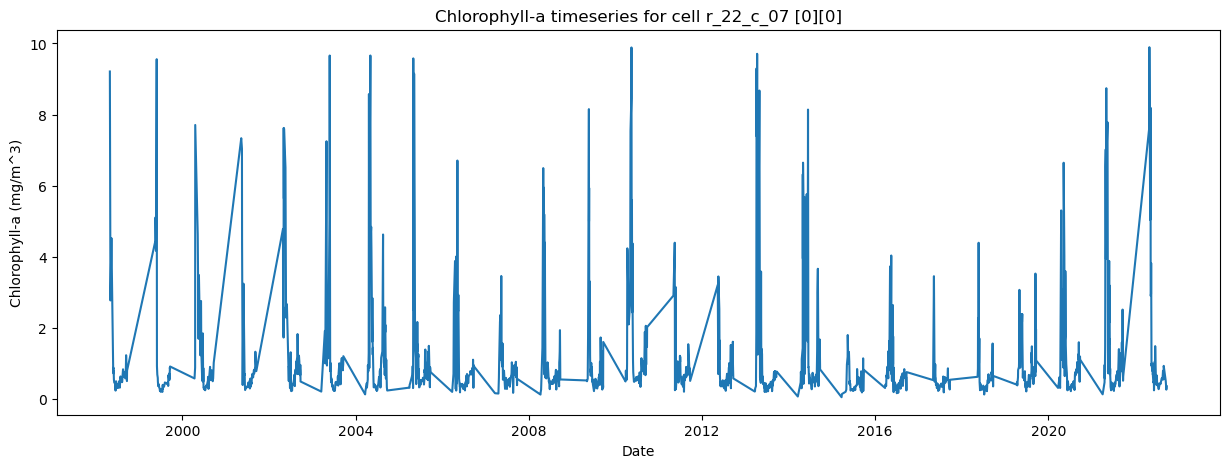

In [81]:
# plot the timeseries as a line plot with seaborn and matplotlib
plt.figure(figsize=(15, 5))
sns.lineplot(x=np_time_dt, y=chla)
# plt.ylim(0, chla_max)
plt.ylabel('Chlorophyll-a (mg/m^3)')
plt.xlabel('Date')
plt.title('Chlorophyll-a timeseries for cell r_22_c_07 [0][0]')
plt.show()



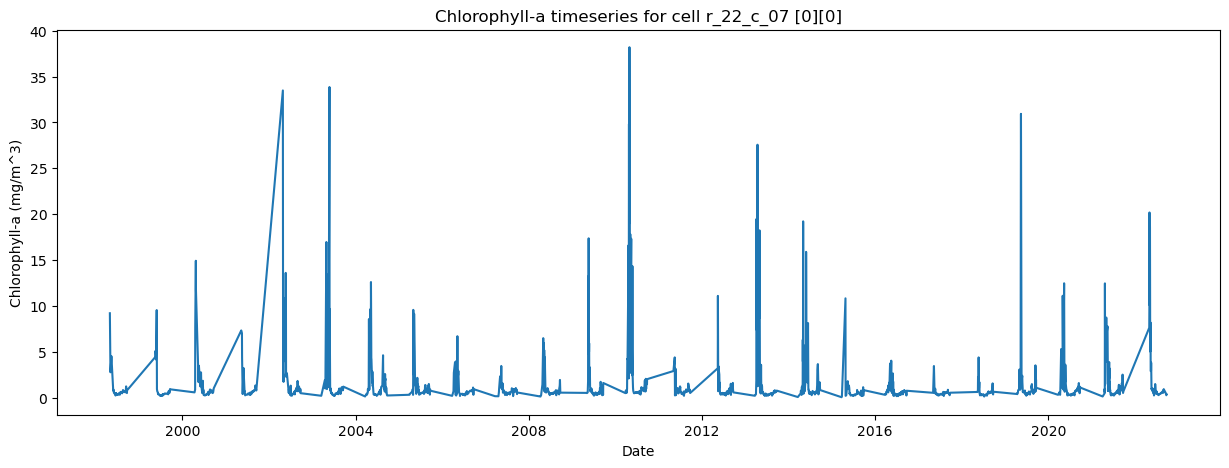

In [72]:
# plot the timeseries as a line plot with seaborn and matplotlib
plt.figure(figsize=(15, 5))
sns.lineplot(x=np_time_dt, y=chla)
# plt.ylim(0, chla_max)
plt.ylabel('Chlorophyll-a (mg/m^3)')
plt.xlabel('Date')
plt.title('Chlorophyll-a timeseries for cell r_22_c_07 [0][0]')
plt.show()



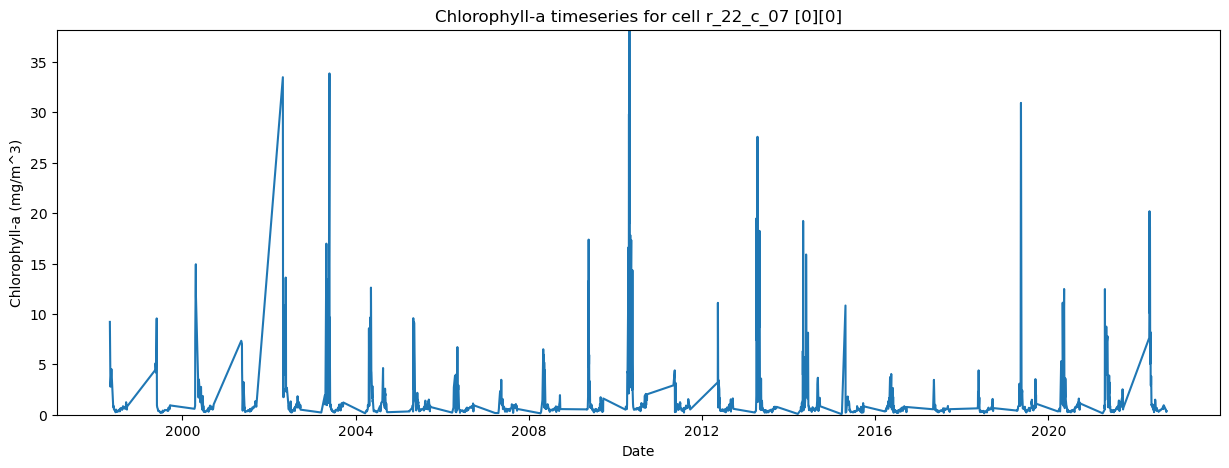

In [71]:
# plot the timeseries as a line plot with seaborn and matplotlib
plt.figure(figsize=(15, 5))
sns.lineplot(x=[dt.datetime.strptime(str(x), '%Y%m%d') for x in combined_array.time.values], y=combined_array.chla.isel(x=0, y=0))
# plt.ylim(0, chla_max)
plt.ylabel('Chlorophyll-a (mg/m^3)')
plt.xlabel('Date')
plt.title('Chlorophyll-a timeseries for cell r_22_c_07 [0][0]')
plt.show()



# Friday 11/09

In [284]:
# open combined_array_20231025.nc
combined_array = xr.open_dataset('combined_array_20231025.nc')

In [285]:
print(combined_array)

<xarray.Dataset>
Dimensions:  (time: 9138, x: 10, y: 10)
Coordinates:
  * x        (x) int64 -300475 -295475 -290475 ... -265475 -260475 -255475
  * y        (y) int64 -2281975 -2276975 -2271975 ... -2246975 -2241975 -2236975
  * time     (time) int64 19980101 19980102 19980103 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 ...


In [292]:
# put chla in a numpy array
chla = np.array(combined_array.chla)

In [293]:
print(np.nanmax(combined_array.chla))
print(np.nanmin(combined_array.chla))

74.833556888862
0.0369437001645565


In [282]:
# get the stdev & mean of chla
chla_std = np.nanstd(combined_array.chla)
chla_mean = np.nanmean(combined_array.chla)
outliers = chla_mean + 3*chla_std
print(chla_mean)
print(chla_std)
print(outliers)

1.2503322366863996
2.314684431467971
8.194385531090312


0.0369437001645565 9.993195771541993


In [301]:
# set  combined_array.chla to nan if > 10
chla[chla > 10] = np.nan
combined_array['chla'].values[combined_array['chla'].values > 10] = np.nan


In [302]:
# get min and max of chla
chla_min = np.nanmin(chla)
chla_max = np.nanmax(chla)
print(chla_min, chla_max)

print()

print(np.nanmin(combined_array.chla), np.nanmax(combined_array.chla))

0.0369437001645565 9.993195771541993

0.0369437001645565 9.993195771541993


In [303]:
# get a new array called averages where chla is averaged over time
chla_grid_averages = combined_array.chla.mean(dim='time')

print(chla_grid_averages)
print(chla_grid_averages.shape)

<xarray.DataArray 'chla' (x: 10, y: 10)>
array([[1.04042704, 1.05913632, 1.06155664, 1.09160406, 1.05630111,
        1.03389541, 1.0214114 , 0.99090564, 0.93240079, 0.84882016],
       [1.01341636, 1.04485081, 1.03558342, 1.04750218, 1.04813185,
        1.02204822, 0.97644996, 0.97663833, 0.92414421, 0.86836442],
       [1.00443169, 1.00902251, 1.02955103, 1.01826298, 0.99098411,
        1.01491592, 0.97707639, 0.96786481, 0.92770894, 0.87451411],
       [0.97033006, 1.00557926, 1.02181449, 1.00533096, 1.00364376,
        1.01527857, 1.02227213, 0.98719157, 0.96463191, 0.92827069],
       [0.92274206, 0.98450501, 0.99428994, 1.02006142, 1.01991456,
        1.04406345, 1.04546115, 1.0127247 , 1.00772009, 1.0190944 ],
       [0.8490934 , 0.87520909, 0.93697822, 0.9797654 , 1.00576886,
        1.03716171, 1.04575307, 1.03498258, 1.06496332, 1.16136716],
       [0.81560648, 0.85645443, 0.91246776, 0.95313466, 0.97250899,
        1.0114779 , 1.08133322, 1.09004376, 1.13633621, 1.28560579],


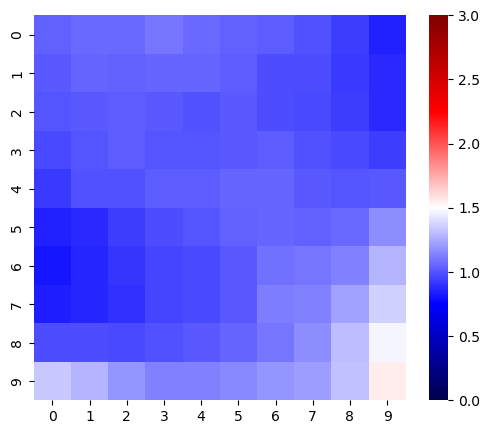

In [307]:
# plot averages as a heatmap 
plt.figure(figsize=(6, 5))
sns.heatmap(chla_grid_averages, cmap='seismic', vmin=0, vmax=3)
plt.show()
plt.close()

In [308]:
# print min and max of chla_grid_averages
print(np.nanmin(chla_grid_averages))
print(np.nanmax(chla_grid_averages))

0.8156064839093761
1.5510807178777422


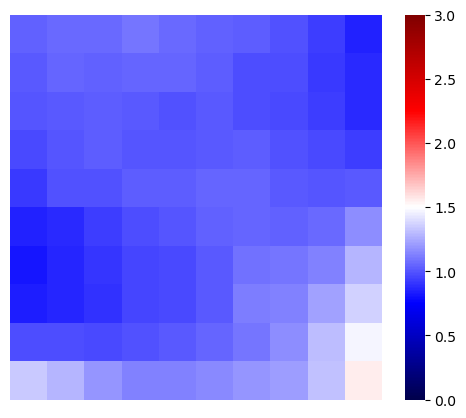

In [309]:
# plot averages as a heatmap 
plt.figure(figsize=(6, 5))
sns.heatmap(chla_grid_averages, cmap='seismic', vmin=0, vmax=3)

# Remove x and y labels and ticks
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

plt.show()
plt.close()

# Annual groups

In [310]:
# create 'time.year' with the first 4 characters of time 
combined_array['time.year'] = combined_array.time.astype(str).str[:4]
grouped = combined_array.groupby('time.year')

In [311]:
grouped['1999'].chla.mean().item()

0.6024765270177478

In [312]:
annual_averages = {}
annual_median = {}
annual_stddev = {}
for name, group in grouped:
    annual_averages[name] = group['chla'].mean().item()
    annual_median[name] = group['chla'].median().item()
    annual_stddev[name] = group['chla'].std().item()

# drop 2023 from the dictionaries bc its incomplete
annual_averages.pop('2023')
annual_median.pop('2023')
annual_stddev.pop('2023')

nan

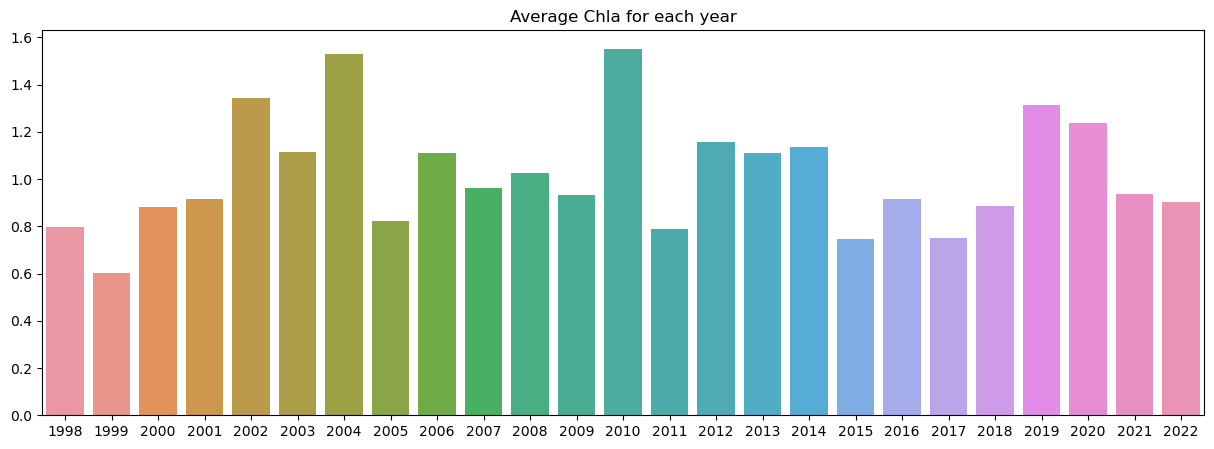

In [313]:
# plot the averages for each year (keys) in averages as bar plot with a trendline
plt.figure(figsize=(15, 5))
sns.barplot(x=list(annual_averages.keys()), y=list(annual_averages.values()))

# sns.lineplot(x=list(annual_averages.keys()), y=list(annual_averages.values()))

plt.title('Average Chla for each year')
plt.show()
plt.close()


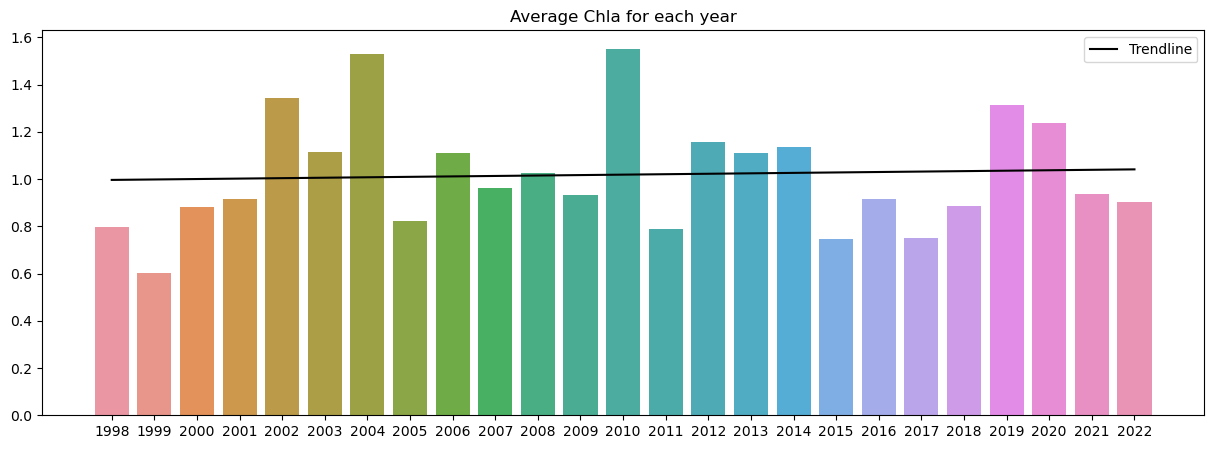

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert annual_averages.values() to a list
y = list(annual_averages.values())

# Generate x values
x = np.arange(len(y))

# Calculate trendline
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Generate y values for the trendline
y_trend = trendline(x)

# Plot the averages for each year (keys) in averages as bar plot with a trendline
plt.figure(figsize=(15, 5))
sns.barplot(x=list(annual_averages.keys()), y=y)
plt.plot(x, y_trend, color='black', label='Trendline')
plt.title('Average Chla for each year')
plt.legend()
plt.show()
plt.close()

### get mean line through year

In [142]:
# for time in combined_array.time: get the mean of chla for each time
daily_averages = {}
daily_median = {}
daily_stddev = {}
for time in combined_array.time.values:
    daily_averages[time] = combined_array.chla.sel(time=time).mean().item()
    daily_median[time] = combined_array.chla.sel(time=time).median().item()
    daily_stddev[time] = combined_array.chla.sel(time=time).std().item()



In [147]:
print(len(daily_averages))
print()
print(daily_averages)

9138

{19980101: nan, 19980102: nan, 19980103: nan, 19980104: nan, 19980105: nan, 19980106: nan, 19980107: nan, 19980108: nan, 19980109: nan, 19980110: nan, 19980111: nan, 19980112: nan, 19980113: nan, 19980114: nan, 19980115: nan, 19980116: nan, 19980117: nan, 19980118: nan, 19980119: nan, 19980120: nan, 19980121: nan, 19980122: nan, 19980123: nan, 19980124: nan, 19980125: nan, 19980126: nan, 19980127: nan, 19980128: nan, 19980129: nan, 19980130: nan, 19980131: nan, 19980201: nan, 19980202: nan, 19980203: nan, 19980204: nan, 19980205: nan, 19980206: nan, 19980207: nan, 19980208: nan, 19980209: nan, 19980210: nan, 19980211: nan, 19980212: nan, 19980213: nan, 19980214: nan, 19980215: nan, 19980216: nan, 19980217: nan, 19980218: nan, 19980219: nan, 19980220: nan, 19980221: nan, 19980222: nan, 19980223: nan, 19980224: nan, 19980225: nan, 19980226: nan, 19980227: nan, 19980228: nan, 19980301: nan, 19980302: nan, 19980303: nan, 19980304: nan, 19980305: nan, 19980306: nan, 19980307: nan, 199

In [153]:
import datetime as dt
convert_time = lambda x: dt.datetime.strptime(str(x), '%Y%m%d')

daily_averages_dt = {convert_time(key): value for key, value in daily_averages.items()}
daily_median_dt = {convert_time(key): value for key, value in daily_median.items()}
daily_stddev_dt = {convert_time(key): value for key, value in daily_stddev.items()}

print(daily_averages_dt)
# print the type of the keys of daily_averages_dt
print(list(daily_averages_dt.keys())[0])

{datetime.datetime(1998, 1, 1, 0, 0): nan, datetime.datetime(1998, 1, 2, 0, 0): nan, datetime.datetime(1998, 1, 3, 0, 0): nan, datetime.datetime(1998, 1, 4, 0, 0): nan, datetime.datetime(1998, 1, 5, 0, 0): nan, datetime.datetime(1998, 1, 6, 0, 0): nan, datetime.datetime(1998, 1, 7, 0, 0): nan, datetime.datetime(1998, 1, 8, 0, 0): nan, datetime.datetime(1998, 1, 9, 0, 0): nan, datetime.datetime(1998, 1, 10, 0, 0): nan, datetime.datetime(1998, 1, 11, 0, 0): nan, datetime.datetime(1998, 1, 12, 0, 0): nan, datetime.datetime(1998, 1, 13, 0, 0): nan, datetime.datetime(1998, 1, 14, 0, 0): nan, datetime.datetime(1998, 1, 15, 0, 0): nan, datetime.datetime(1998, 1, 16, 0, 0): nan, datetime.datetime(1998, 1, 17, 0, 0): nan, datetime.datetime(1998, 1, 18, 0, 0): nan, datetime.datetime(1998, 1, 19, 0, 0): nan, datetime.datetime(1998, 1, 20, 0, 0): nan, datetime.datetime(1998, 1, 21, 0, 0): nan, datetime.datetime(1998, 1, 22, 0, 0): nan, datetime.datetime(1998, 1, 23, 0, 0): nan, datetime.datetime(1

In [170]:
import pandas as pd
df = pd.DataFrame.from_dict(daily_averages_dt, orient='index').reset_index()
df.columns = ['date', 'avg_chla']
df  

,date,avg_chla
0,1998-01-01,NaN
1,1998-01-02,NaN
2,1998-01-03,NaN
3,1998-01-04,NaN
4,1998-01-05,NaN
...,...,...
9133,2023-01-27,NaN
9134,2023-01-28,NaN
9135,2023-01-29,NaN
9136,2023-01-30,NaN


In [176]:
df.shape

(9138, 3)

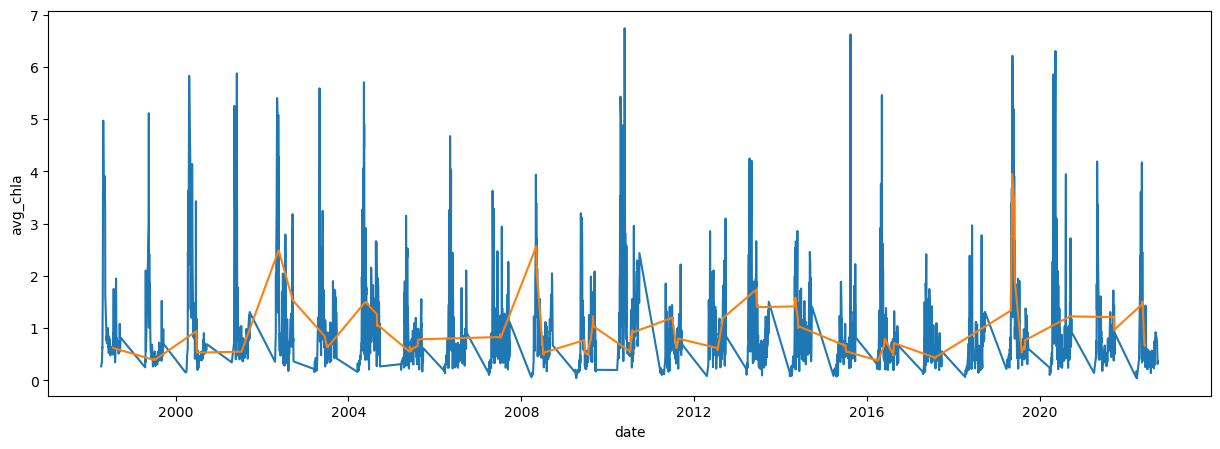

In [179]:
# plot the column 'index' vs the column 0

# get the rolling mean of column 0 with a window of 10
df['rolling_mean'] = df['avg_chla'].rolling(window=10, center=True).mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='avg_chla', data=df)
# plot df['rolling_mean'] as a line plot
sns.lineplot(x='date', y='rolling_mean', data=df)

plt.show()
plt.close()


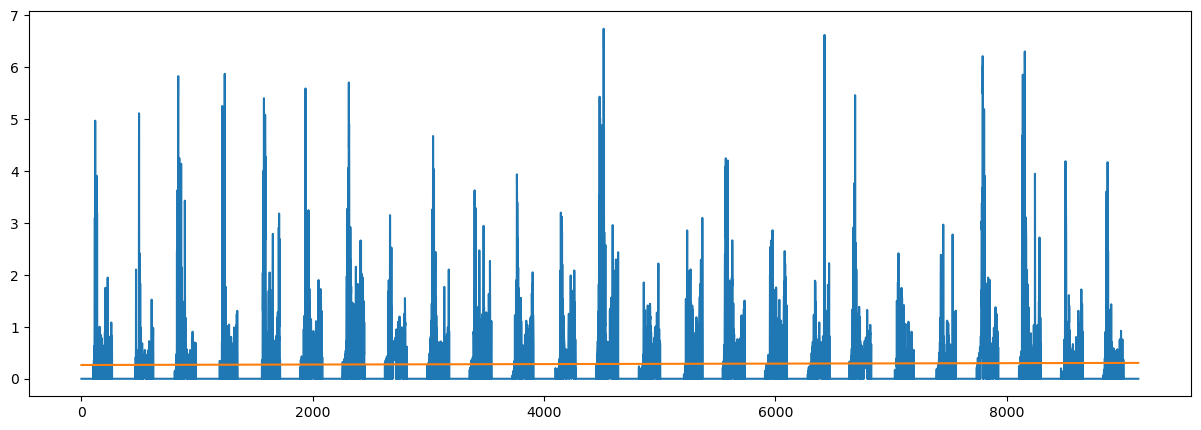

In [182]:
# set nan values to 0 in ['avg_chla]
chla = df['avg_chla'].fillna(0)

# Generate x values
x = np.arange(len(chla))


# Calculate trendline
coefficients = np.polyfit(x, chla, 1)
trendline = np.poly1d(coefficients)

# Plot the data
plt.figure(figsize=(15, 5))
plt.plot(x, chla)
plt.plot(x, trendline(x))
plt.show()
plt.close()

## plotting trends

In [189]:
# for time in combined_array.time: get the mean of chla for each time
daily_averages = {}
daily_median = {}
daily_stddev = {}
for time in combined_array.time.values:
    daily_averages[time] = combined_array.chla.sel(time=time).mean().item()
    daily_median[time] = combined_array.chla.sel(time=time).median().item()
    daily_stddev[time] = combined_array.chla.sel(time=time).std().item()

import datetime as dt
convert_time = lambda x: dt.datetime.strptime(str(x), '%Y%m%d')

daily_averages_dt = {convert_time(key): value for key, value in daily_averages.items()}
daily_median_dt = {convert_time(key): value for key, value in daily_median.items()}
daily_stddev_dt = {convert_time(key): value for key, value in daily_stddev.items()}

print(daily_averages_dt)
# print the type of the keys of daily_averages_dt
print(list(daily_averages_dt.keys())[0])

{datetime.datetime(1998, 1, 1, 0, 0): nan, datetime.datetime(1998, 1, 2, 0, 0): nan, datetime.datetime(1998, 1, 3, 0, 0): nan, datetime.datetime(1998, 1, 4, 0, 0): nan, datetime.datetime(1998, 1, 5, 0, 0): nan, datetime.datetime(1998, 1, 6, 0, 0): nan, datetime.datetime(1998, 1, 7, 0, 0): nan, datetime.datetime(1998, 1, 8, 0, 0): nan, datetime.datetime(1998, 1, 9, 0, 0): nan, datetime.datetime(1998, 1, 10, 0, 0): nan, datetime.datetime(1998, 1, 11, 0, 0): nan, datetime.datetime(1998, 1, 12, 0, 0): nan, datetime.datetime(1998, 1, 13, 0, 0): nan, datetime.datetime(1998, 1, 14, 0, 0): nan, datetime.datetime(1998, 1, 15, 0, 0): nan, datetime.datetime(1998, 1, 16, 0, 0): nan, datetime.datetime(1998, 1, 17, 0, 0): nan, datetime.datetime(1998, 1, 18, 0, 0): nan, datetime.datetime(1998, 1, 19, 0, 0): nan, datetime.datetime(1998, 1, 20, 0, 0): nan, datetime.datetime(1998, 1, 21, 0, 0): nan, datetime.datetime(1998, 1, 22, 0, 0): nan, datetime.datetime(1998, 1, 23, 0, 0): nan, datetime.datetime(1

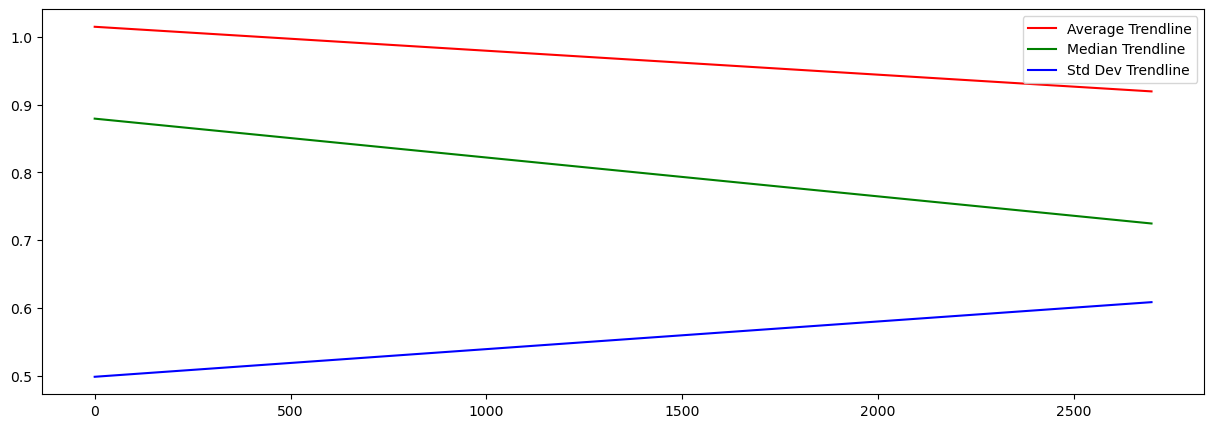

In [194]:
# Convert the dictionary values to lists and remove NaN values
y_avg = [v for v in daily_averages.values() if not np.isnan(v)]
y_med = [v for v in daily_median.values() if not np.isnan(v)]
y_std = [v for v in daily_stddev.values() if not np.isnan(v)]

# Generate x values
x_avg = np.arange(len(y_avg))
x_med = np.arange(len(y_med))
x_std = np.arange(len(y_std))

# Calculate trendlines
coefficients_avg = np.polyfit(x_avg, y_avg, 1)
trendline_avg = np.poly1d(coefficients_avg)

coefficients_med = np.polyfit(x_med, y_med, 1)
trendline_med = np.poly1d(coefficients_med)

coefficients_std = np.polyfit(x_std, y_std, 1)
trendline_std = np.poly1d(coefficients_std)

# Generate y values for the trendlines
y_trend_avg = trendline_avg(x_avg)
y_trend_med = trendline_med(x_med)
y_trend_std = trendline_std(x_std)

# Plot trendlines
plt.figure(figsize=(15, 5))
plt.plot(x_avg, y_trend_avg, color='red', label='Average Trendline')
plt.plot(x_med, y_trend_med, color='green', label='Median Trendline')
plt.plot(x_std, y_trend_std, color='blue', label='Std Dev Trendline')
plt.legend()
plt.show()
plt.close()

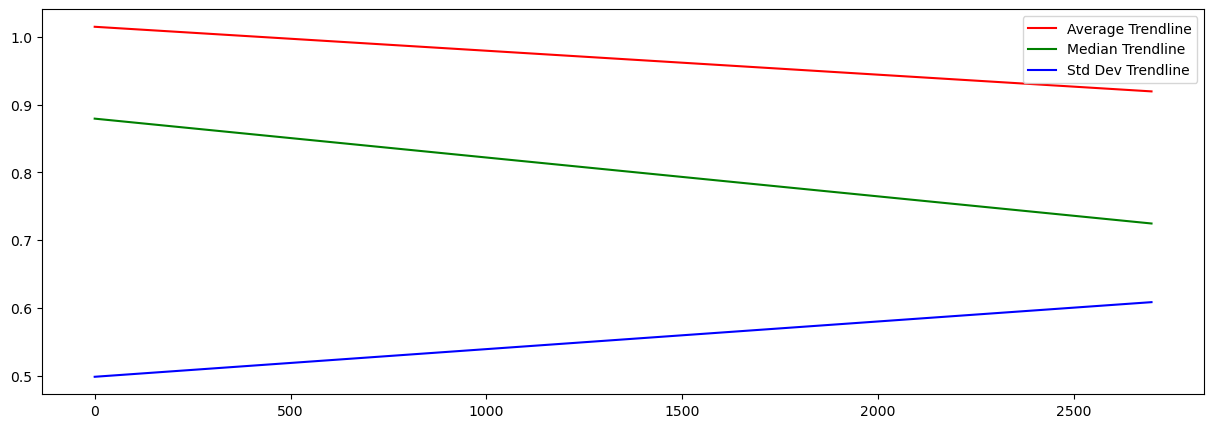

In [204]:
# Convert the dictionary values to lists and remove NaN values
avg_mean = np.nanmean(list(daily_averages.values()))
med_mean = np.nanmean(list(daily_median.values()))
std_mean = np.nanmean(list(daily_stddev.values()))

y_avg = [v for v in daily_averages.values() if not np.isnan(v)]
y_med = [v for v in daily_median.values() if not np.isnan(v)]
y_std = [v for v in daily_stddev.values() if not np.isnan(v)]

# Generate x values
x_avg = np.arange(len(y_avg))
x_med = np.arange(len(y_med))
x_std = np.arange(len(y_std))

# Calculate trendlines
coefficients_avg = np.polyfit(x_avg, y_avg, 1)
trendline_avg = np.poly1d(coefficients_avg)

coefficients_med = np.polyfit(x_med, y_med, 1)
trendline_med = np.poly1d(coefficients_med)

coefficients_std = np.polyfit(x_std, y_std, 1)
trendline_std = np.poly1d(coefficients_std)

# Generate y values for the trendlines
y_trend_avg = trendline_avg(x_avg)
y_trend_med = trendline_med(x_med)
y_trend_std = trendline_std(x_std)

# Plot trendlines
plt.figure(figsize=(15, 5))
plt.plot(x_avg, y_trend_avg, color='red', label='Average Trendline')
plt.plot(x_med, y_trend_med, color='green', label='Median Trendline')
plt.plot(x_std, y_trend_std, color='blue', label='Std Dev Trendline')
plt.legend()
plt.show()
plt.close()

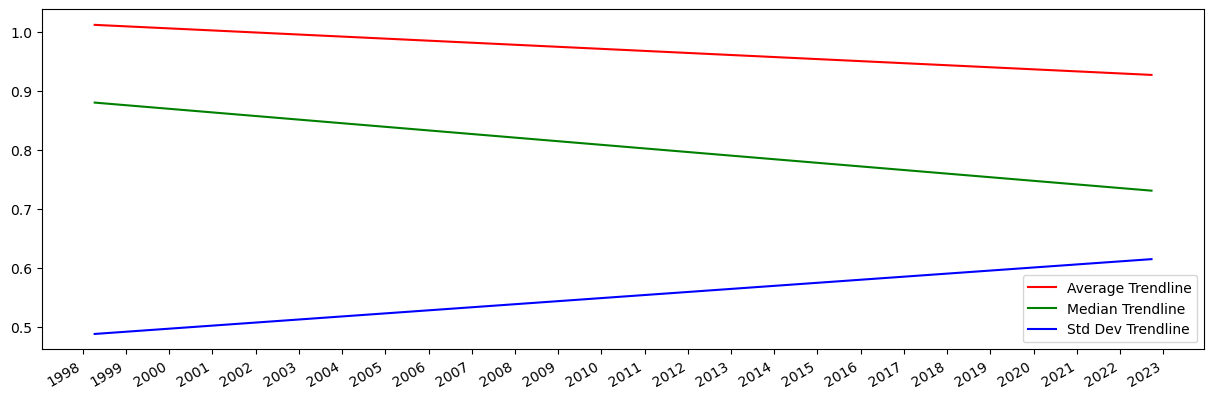

In [316]:
import matplotlib.dates as mdates
from datetime import datetime

# Convert the dictionary values to lists and remove NaN values
y_avg = [v for v in daily_averages.values() if not np.isnan(v)]
y_med = [v for v in daily_median.values() if not np.isnan(v)]
y_std = [v for v in daily_stddev.values() if not np.isnan(v)]

# Generate x values
x_avg = [datetime.strptime(str(k), '%Y%m%d') for k, v in daily_averages.items() if not np.isnan(v)]
x_med = [datetime.strptime(str(k), '%Y%m%d') for k, v in daily_median.items() if not np.isnan(v)]
x_std = [datetime.strptime(str(k), '%Y%m%d') for k, v in daily_stddev.items() if not np.isnan(v)]

# Convert dates to numbers
x_avg_num = mdates.date2num(x_avg)
x_med_num = mdates.date2num(x_med)
x_std_num = mdates.date2num(x_std)

# Calculate trendlines
coefficients_avg = np.polyfit(x_avg_num, y_avg, 1)
trendline_avg = np.poly1d(coefficients_avg)

coefficients_med = np.polyfit(x_med_num, y_med, 1)
trendline_med = np.poly1d(coefficients_med)

coefficients_std = np.polyfit(x_std_num, y_std, 1)
trendline_std = np.poly1d(coefficients_std)

# Generate y values for the trendlines
y_trend_avg = trendline_avg(x_avg_num)
y_trend_med = trendline_med(x_med_num)
y_trend_std = trendline_std(x_std_num)

# Plot trendlines
plt.figure(figsize=(15, 5))
plt.plot(x_avg, y_trend_avg, color='red', label='Average Trendline')
plt.plot(x_med, y_trend_med, color='green', label='Median Trendline')
plt.plot(x_std, y_trend_std, color='blue', label='Std Dev Trendline')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # set interval to 1 year
plt.gcf().autofmt_xdate()  # rotate dates for better display

plt.legend()
plt.show()
plt.close()

# By Pixel

In [318]:
# group combined_array by year
annual_grouped = combined_array.groupby('time.year')

In [319]:
# grouped['1999'].chla.mean()

# for grouped['1999'] get the time dim mean of chla for each x,y coordinate
annual_averages = {}
annual_medians = {}
annual_stddevs = {}
for name, group in annual_grouped:
    annual_averages[name] = group['chla'].mean(dim='time').values
    annual_medians[name] = group['chla'].median(dim='time').values
    annual_stddevs[name] = group['chla'].std(dim='time').values

annual_averages['1999'].shape

(10, 10)

In [320]:
list(annual_averages.values())

[array([[0.85390297, 0.68533447, 0.59443934, 0.66058902, 0.85071281,
         0.72737816, 0.72567129, 0.84964786, 0.87074075, 0.89583311],
        [0.68959928, 0.67265143, 0.7842826 , 0.77889351, 0.72128805,
         0.85545422, 0.73176125, 0.76686879, 0.83601339, 0.8457476 ],
        [0.79645056, 0.78937436, 0.80811382, 0.6717787 , 0.67462988,
         0.63012751, 0.77344547, 0.59004143, 0.68599359, 0.71360204],
        [0.81519802, 0.89509629, 0.91154358, 0.65798939, 0.79655013,
         0.65387145, 0.66346425, 0.57486463, 0.64481001, 0.74644291],
        [0.90279356, 1.09315456, 0.91279201, 0.83200565, 0.80654608,
         0.59052317, 0.59704102, 0.59174985, 0.60682266, 0.65074014],
        [0.8342896 , 0.78218055, 0.77473213, 0.84319765, 0.80289186,
         0.73057131, 0.59937493, 0.79526381, 0.60266026, 0.61559919],
        [0.94541157, 0.88606614, 0.89196106, 0.91142989, 0.96723355,
         0.93314898, 0.69308313, 0.64843318, 0.66678986, 0.66674638],
        [0.87781168, 0.8429

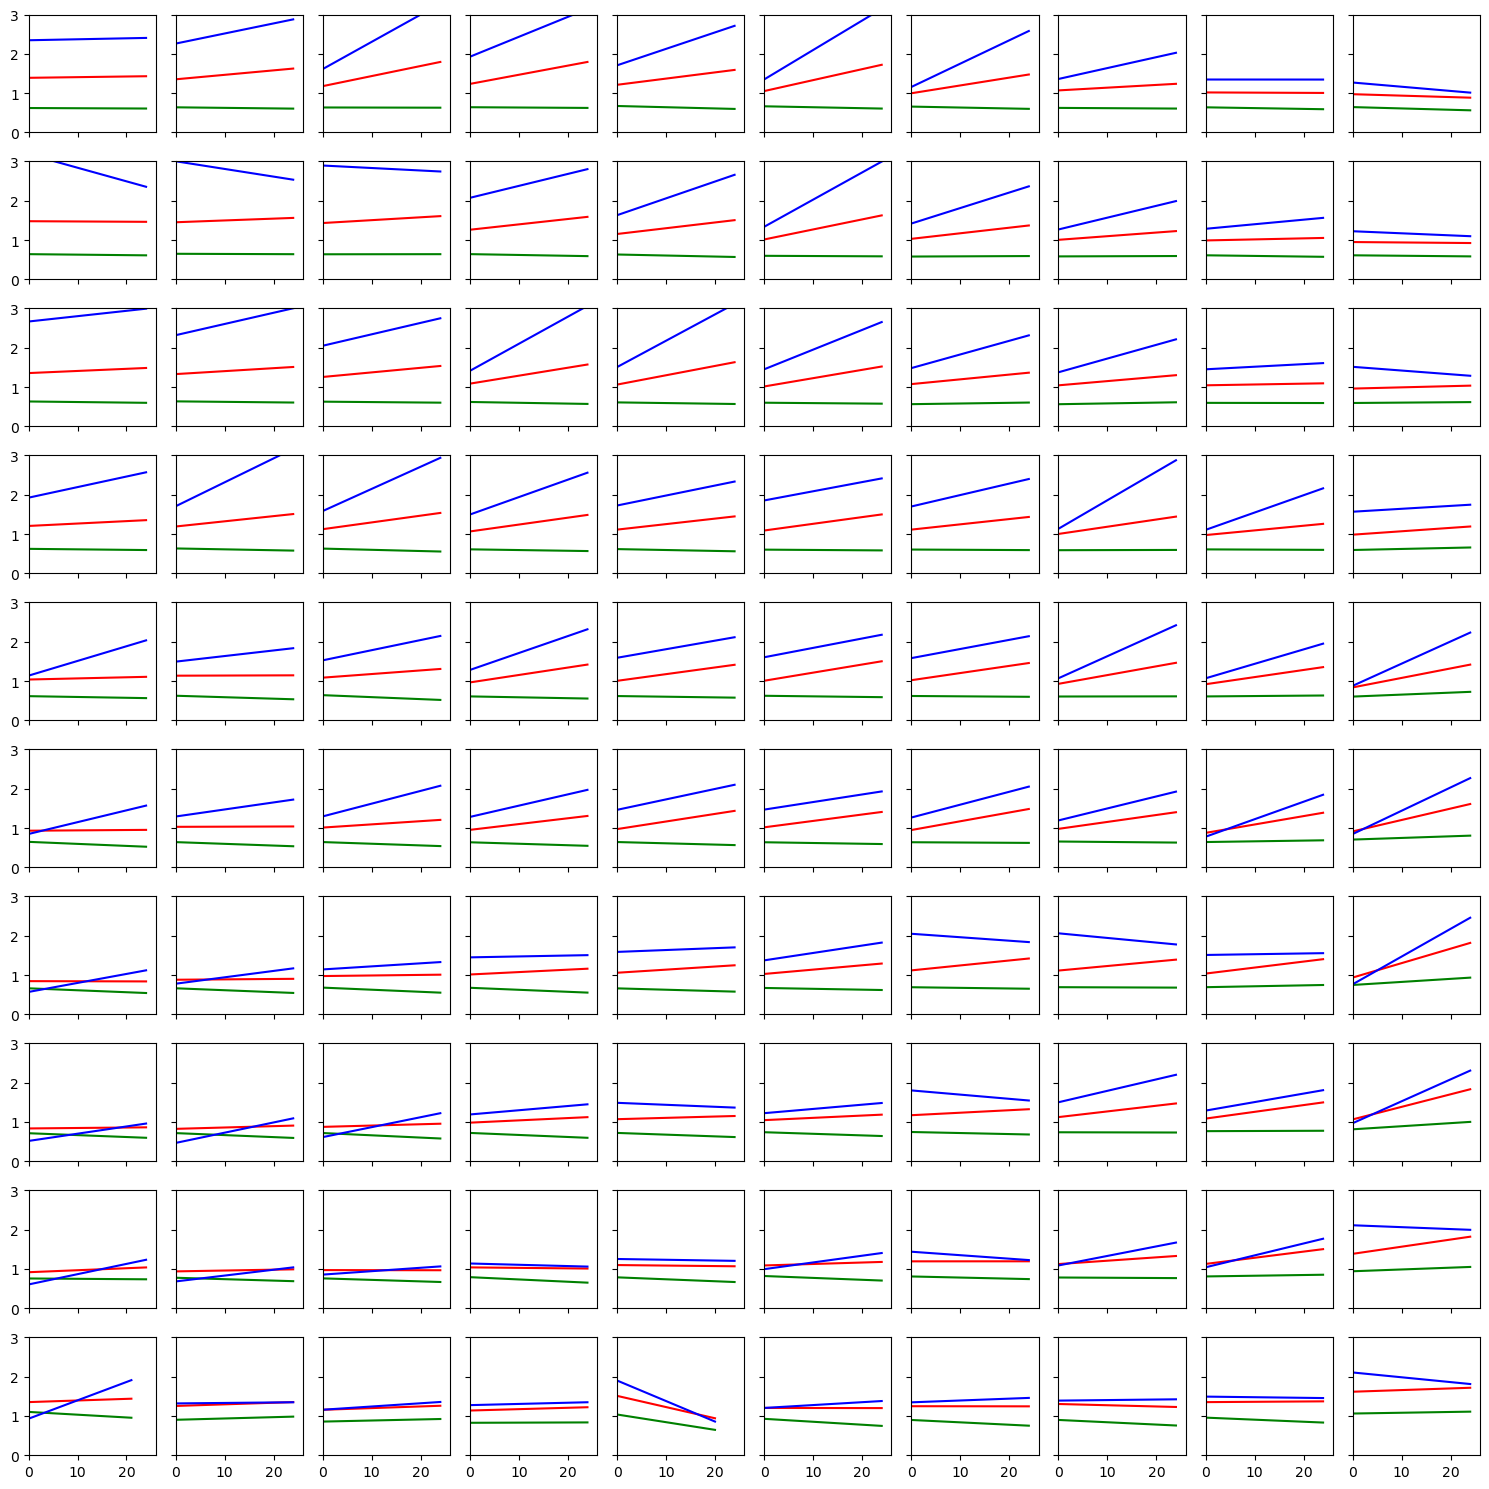

In [234]:
# r_22_c_07
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        if i != 9:  # if not the bottom row
            axs[i, j].tick_params(labelbottom=False)
        if j != 0:  # if not the leftmost column
            axs[i, j].tick_params(labelleft=False)

plt.tight_layout()
plt.show()

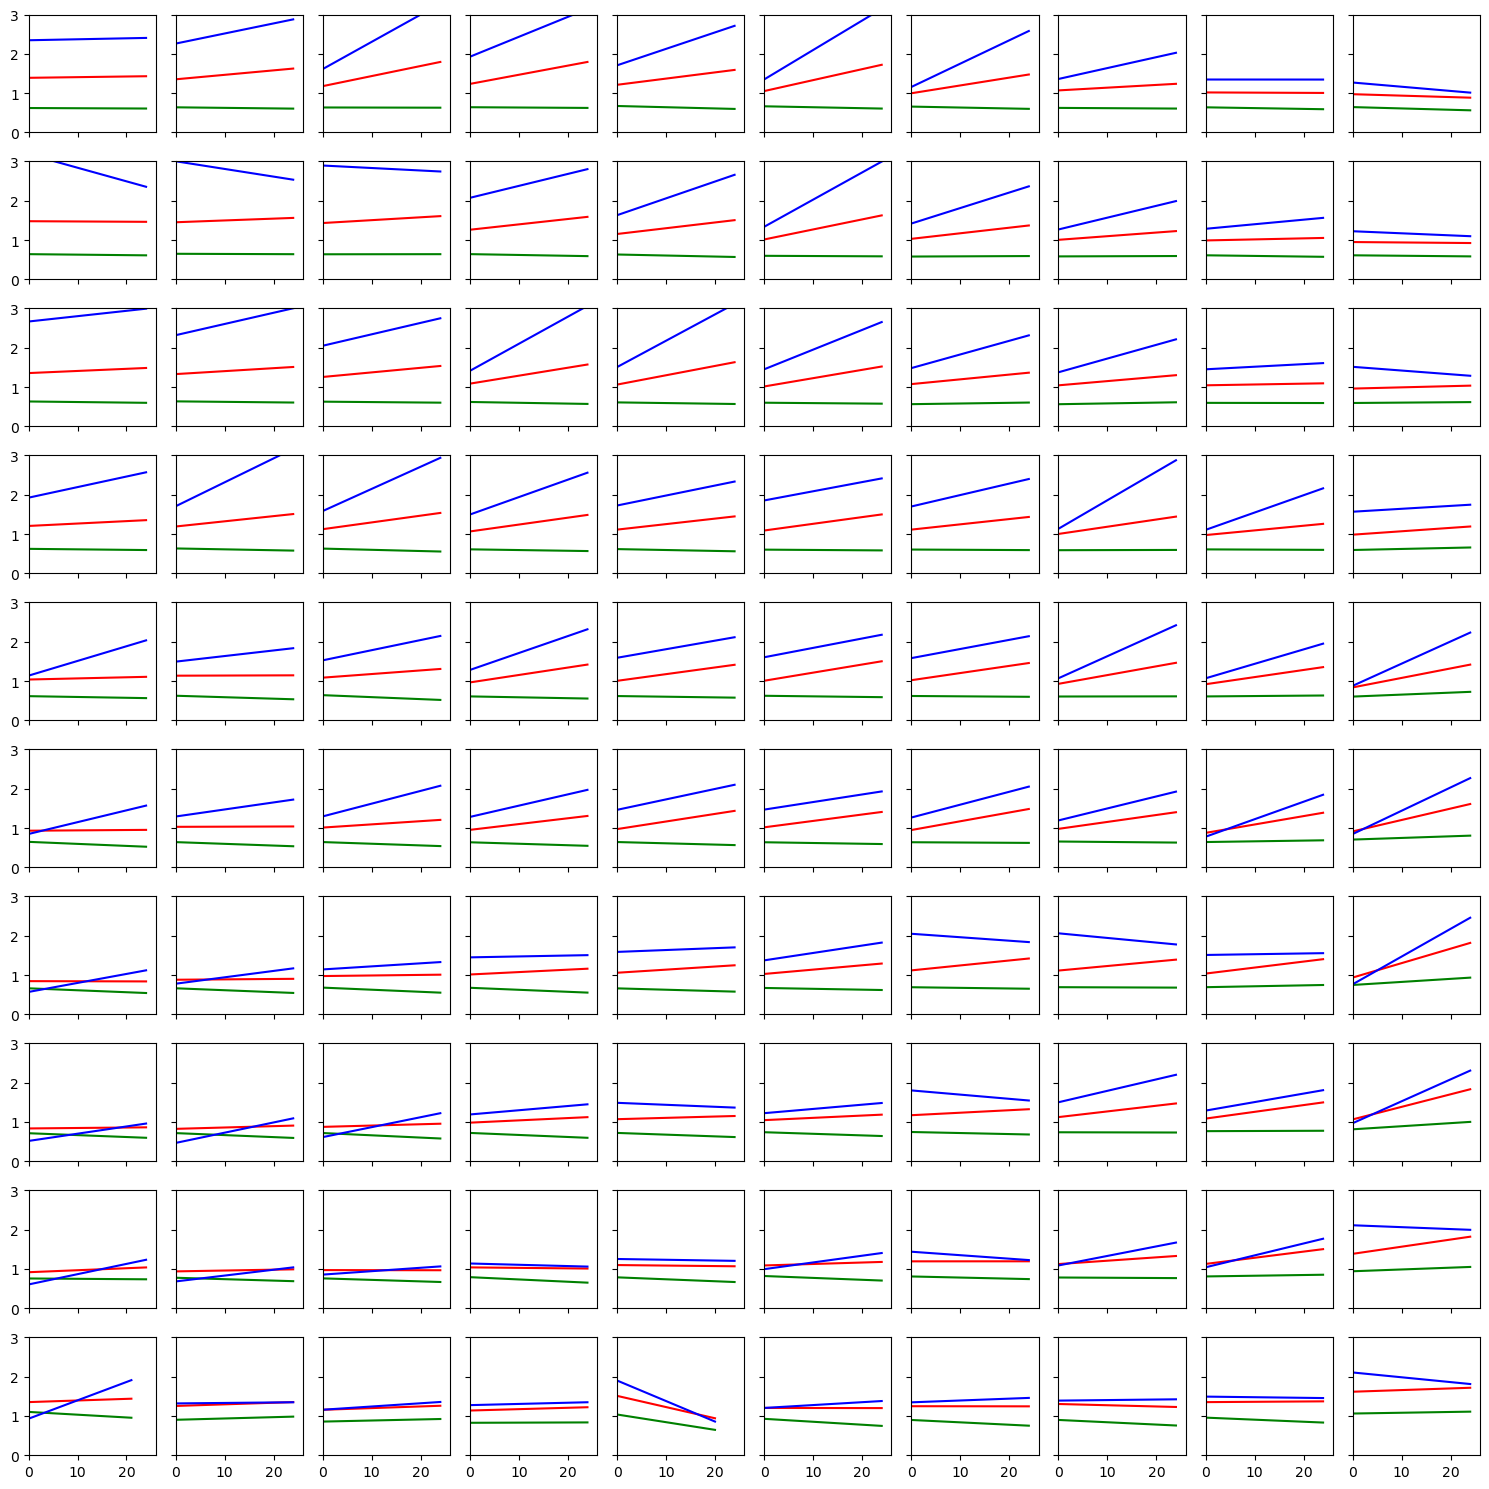

In [236]:
# r_22_c_07

fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        if i != 9:  # if not the bottom row
            axs[i, j].tick_params(labelbottom=False)
        if j != 0:  # if not the leftmost column
            axs[i, j].tick_params(labelleft=False)

plt.tight_layout()
plt.show()
plt.close()

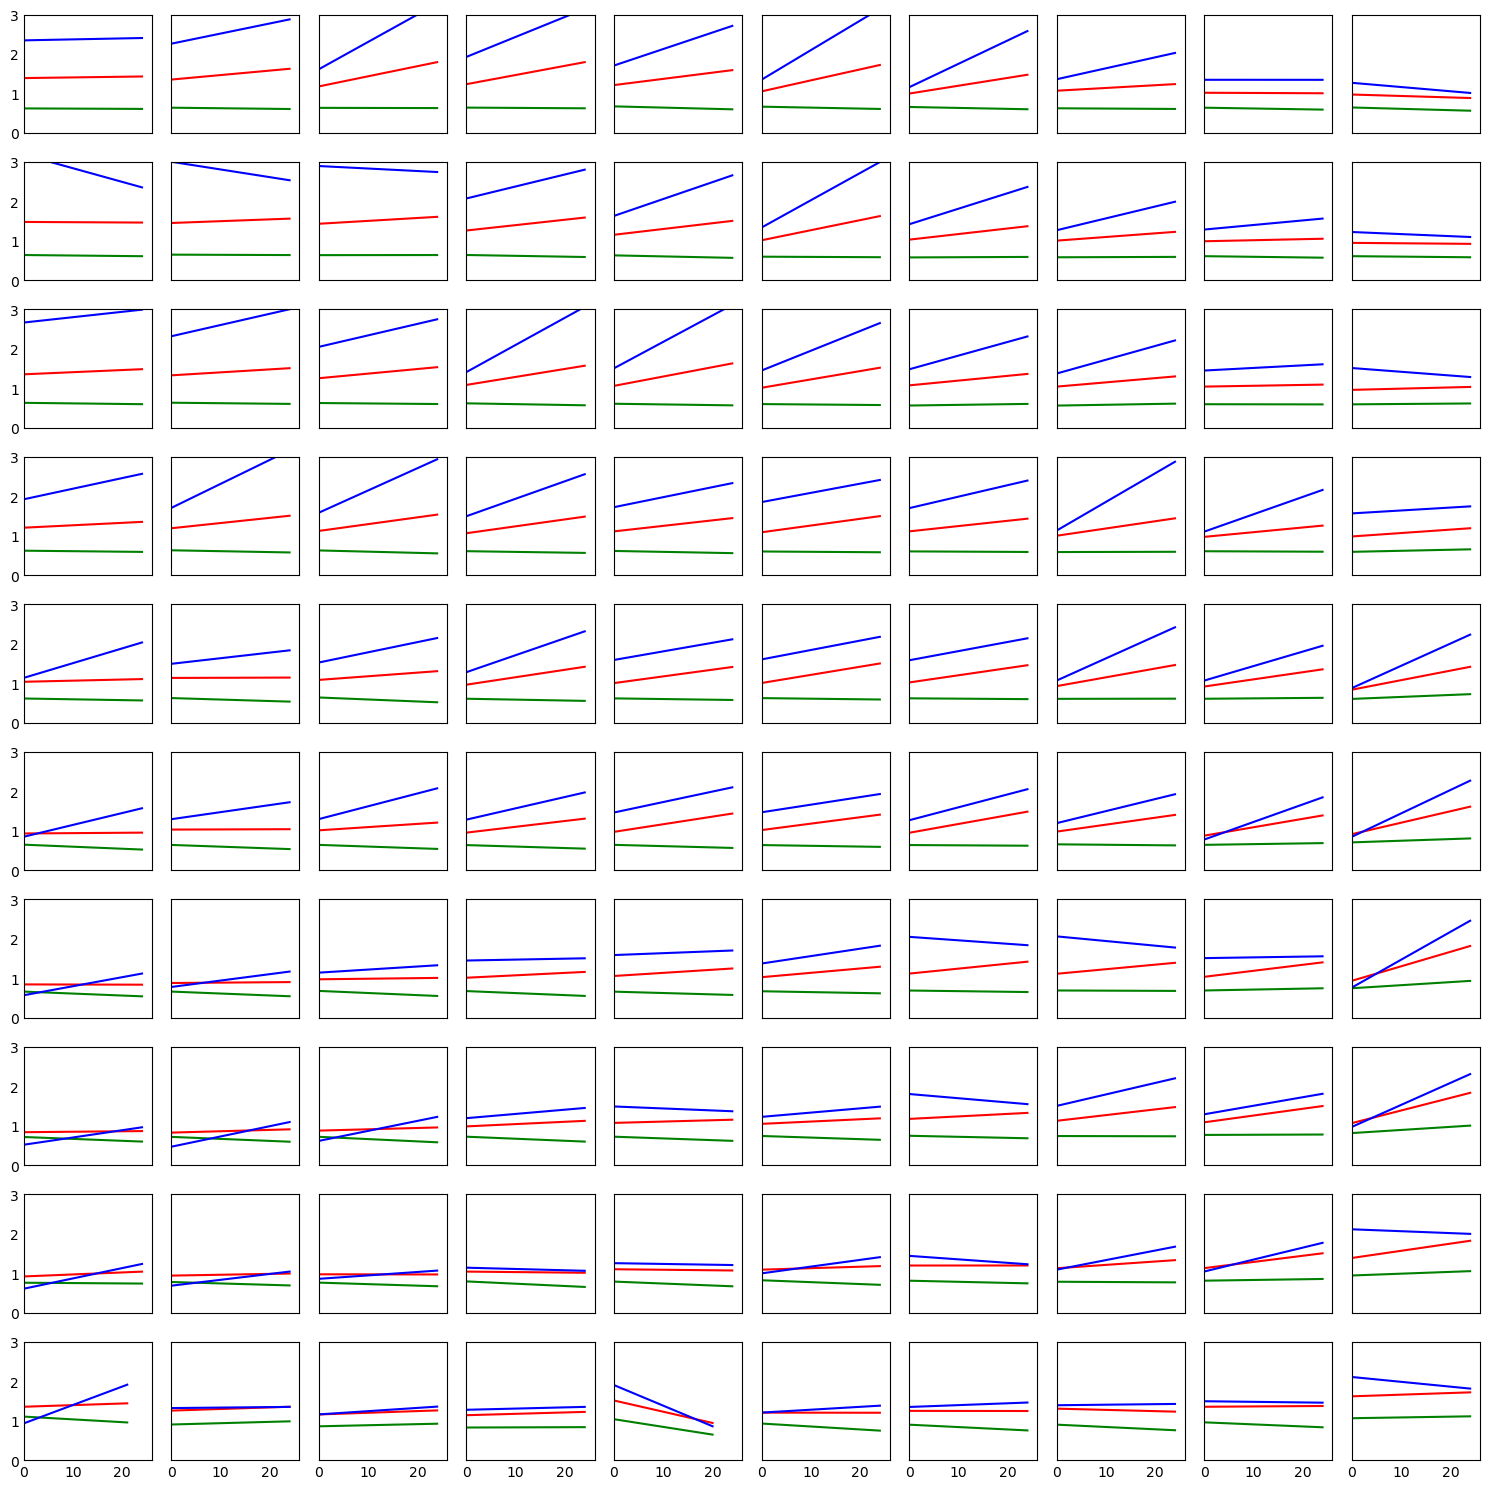

In [235]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)

# Enable labels for bottom row and leftmost column
for ax in axs[9, :]:
    ax.tick_params(labelbottom=True)
for ax in axs[:, 0]:
    ax.tick_params(labelleft=True)

plt.tight_layout()
plt.show()
plt.close()

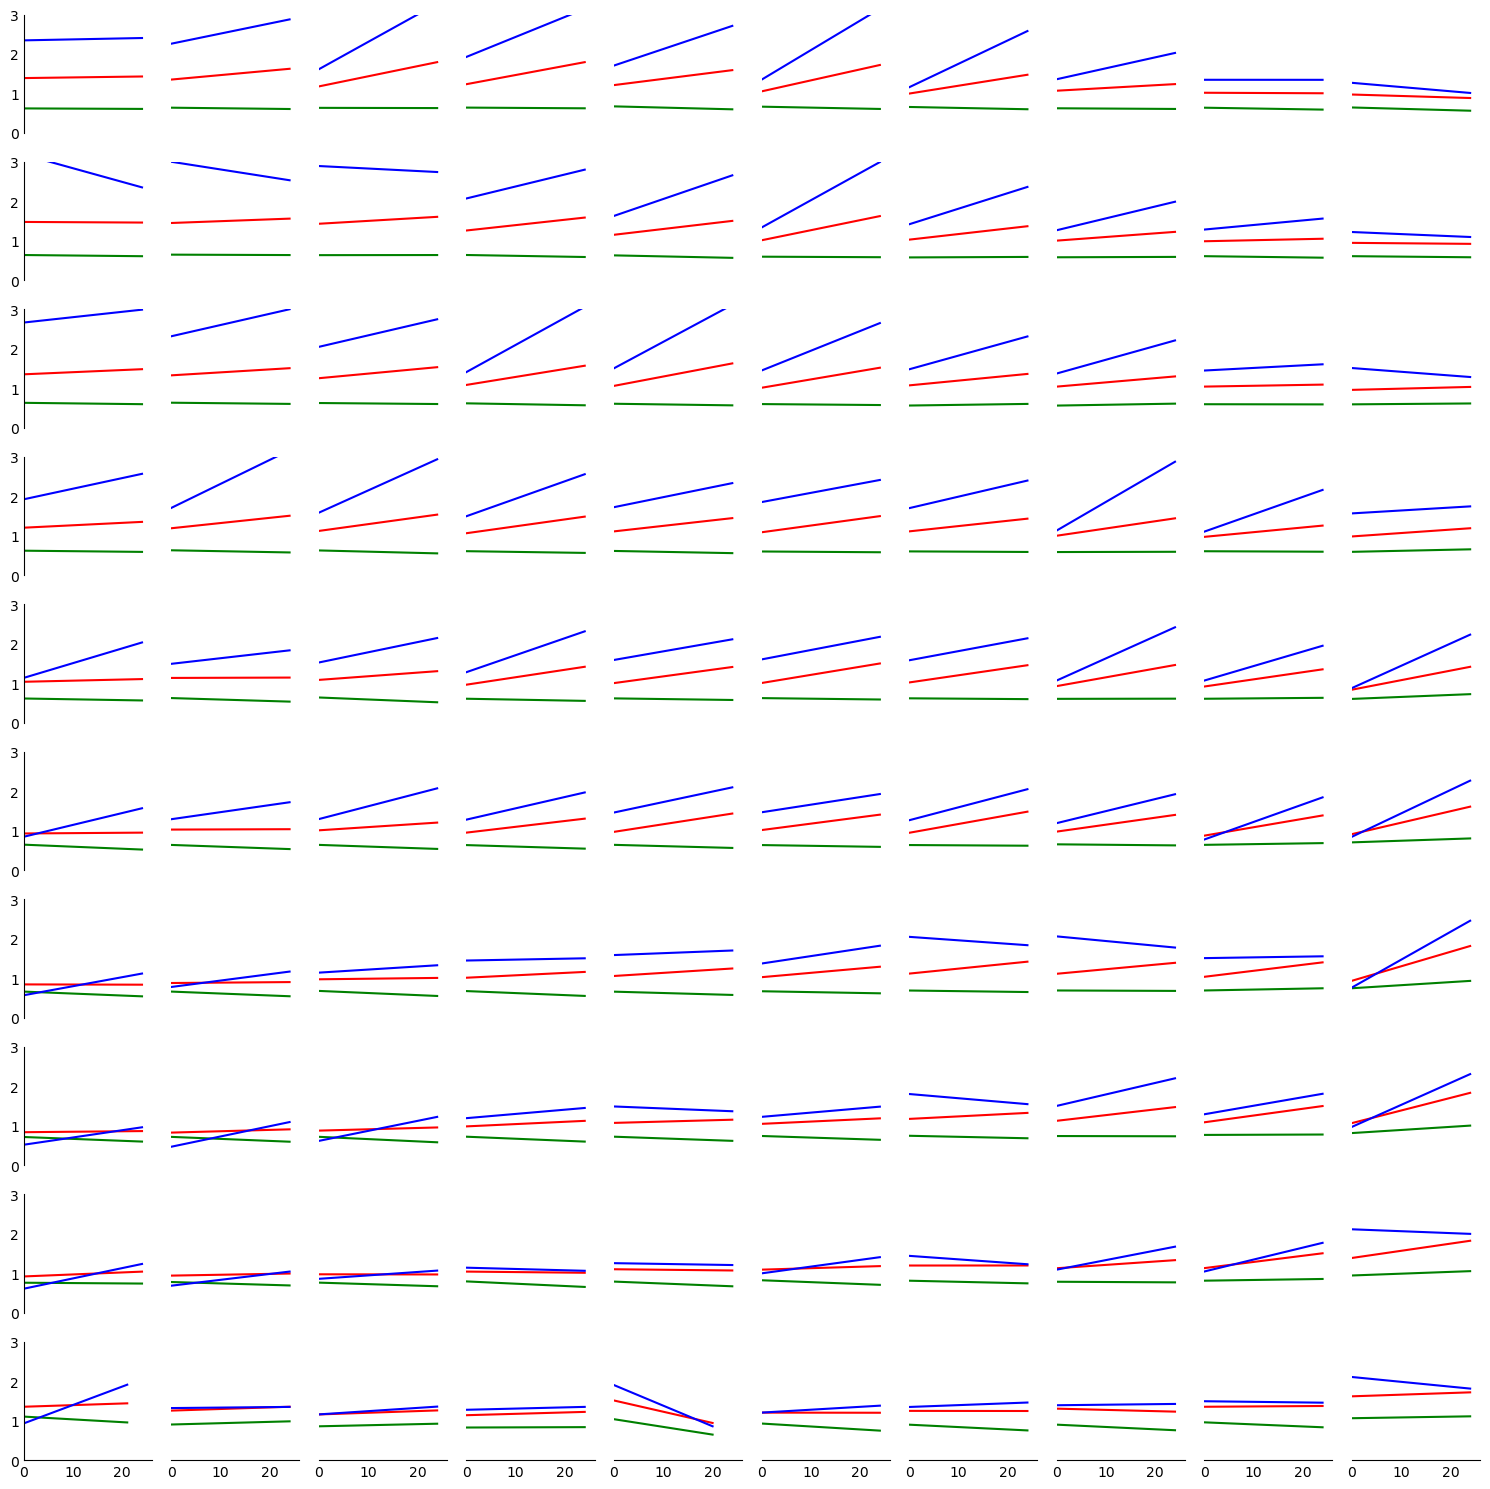

In [237]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)

        # Hide grid border
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)

# Enable labels for bottom row and leftmost column
for ax in axs[9, :]:
    ax.tick_params(labelbottom=True)
    ax.spines['bottom'].set_visible(True)
for ax in axs[:, 0]:
    ax.tick_params(labelleft=True)
    ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.show()
plt.close()

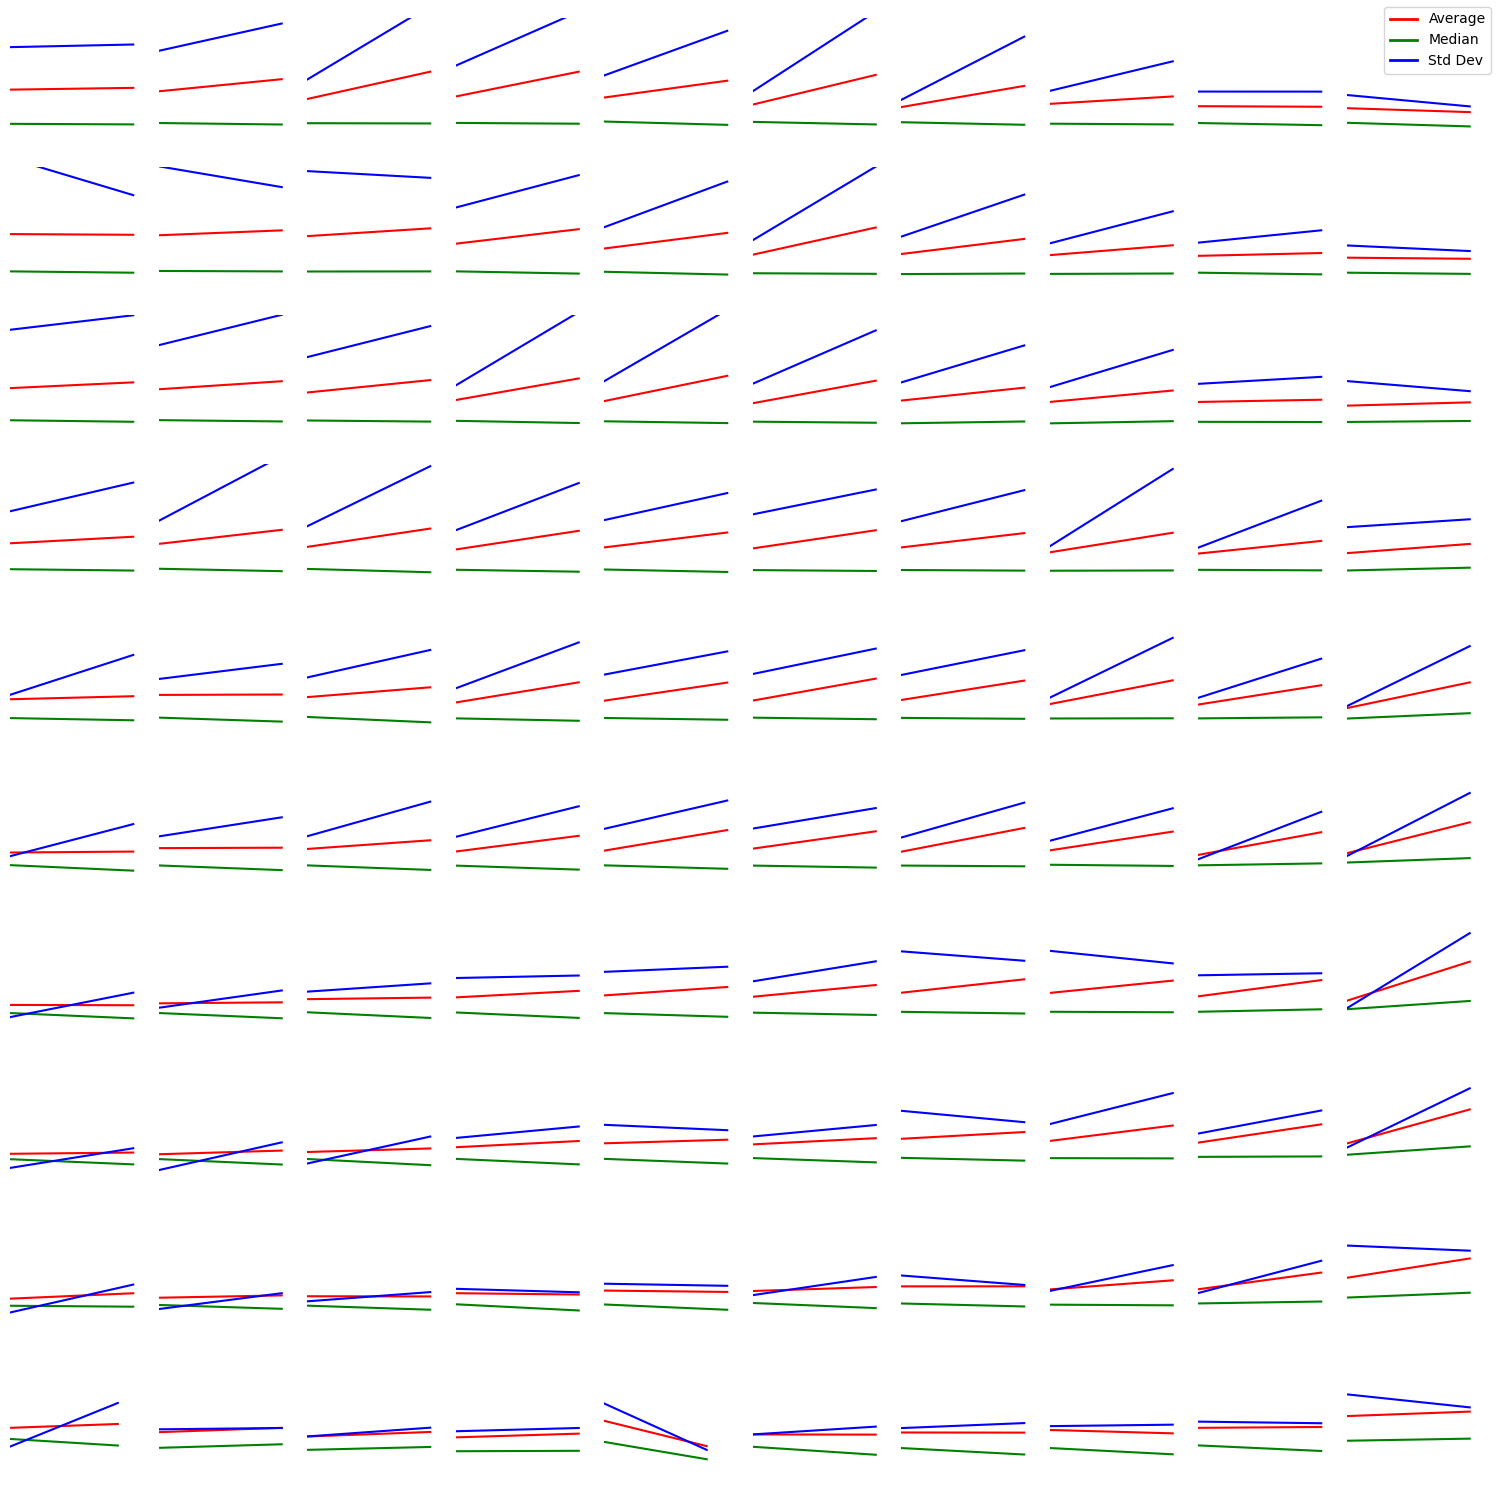

In [239]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Create a custom legend
custom_lines = [plt.Line2D([0], [0], color='red', lw=2),
                plt.Line2D([0], [0], color='green', lw=2),
                plt.Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_lines, ['Average', 'Median', 'Std Dev'], loc='upper right')

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        # axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)

        # # Hide grid border
        # axs[i, j].spines['top'].set_visible(False)
        # axs[i, j].spines['right'].set_visible(False)
        # axs[i, j].spines['bottom'].set_visible(False)
        # axs[i, j].spines['left'].set_visible(False)

        # Hide labels, ticks, and borders
        axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)

# # Enable labels for bottom row and leftmost column
# for ax in axs[9, :]:
#     ax.tick_params(labelbottom=True)
#     ax.spines['bottom'].set_visible(True)
# for ax in axs[:, 0]:
#     ax.tick_params(labelleft=True)
#     ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.show()
plt.close()

### annual bar plots

In [249]:
i,j = 0,0
y = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
x = list(annual_averages.keys())
print(x)
# x = int(x) for x in x
x = [int(x) for x in x]
print(x)
print(y)

# Plot bar graph on the i,j subplot
# sns.barplot(x=x, y=y)
# plt.show()

['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[0.8539029686771203, 0.8822667828077603, 1.5139172377532468, 0.9719737113912045, 2.6509865970037017, 1.9237145220236052, 1.733173383395618, 1.1039130590055297, 0.8957871243154559, 0.7539468107172834, 1.23409782858389, 1.2944831249111517, 3.988770168568659, 0.8708249814898621, 0.9122745658227943, 2.2090158380284737, 2.1233120131675105, 0.6240910844366748, 0.7509472279371857, 0.5468918899443457, 0.6743609228486152, 1.629391752996554, 1.3651704612470148, 1.6881309218109555, 2.056372025380101]


In [250]:
annual_averages.values()

dict_values([array([[0.85390297, 0.91929056, 0.95965539, 1.53746259, 1.40264989,
        1.03200348, 0.72567129, 0.84964786, 0.87074075, 0.89583311],
       [0.92172324, 0.99085047, 1.10128609, 1.12122667, 0.8940191 ,
        0.85545422, 1.03673216, 0.76686879, 0.83601339, 0.8457476 ],
       [1.02251   , 1.11843556, 1.09680932, 0.6717787 , 0.87138898,
        0.83633769, 0.94975701, 0.59004143, 0.68599359, 0.71360204],
       [1.08000991, 1.13178526, 1.09107256, 0.86068487, 1.02334029,
        0.91441698, 0.92851484, 0.57486463, 0.64481001, 0.74644291],
       [1.11366647, 1.09315456, 0.91279201, 0.83200565, 1.1296886 ,
        1.24752077, 1.24124075, 0.59174985, 0.60682266, 0.65074014],
       [1.02719638, 0.95901192, 0.77473213, 0.84319765, 1.15439407,
        1.29316621, 0.82473791, 0.79526381, 0.60266026, 0.61559919],
       [0.94541157, 0.88606614, 0.89196106, 0.91142989, 0.96723355,
        0.93314898, 0.69308313, 0.64843318, 0.66678986, 0.66674638],
       [0.87781168, 0.842937

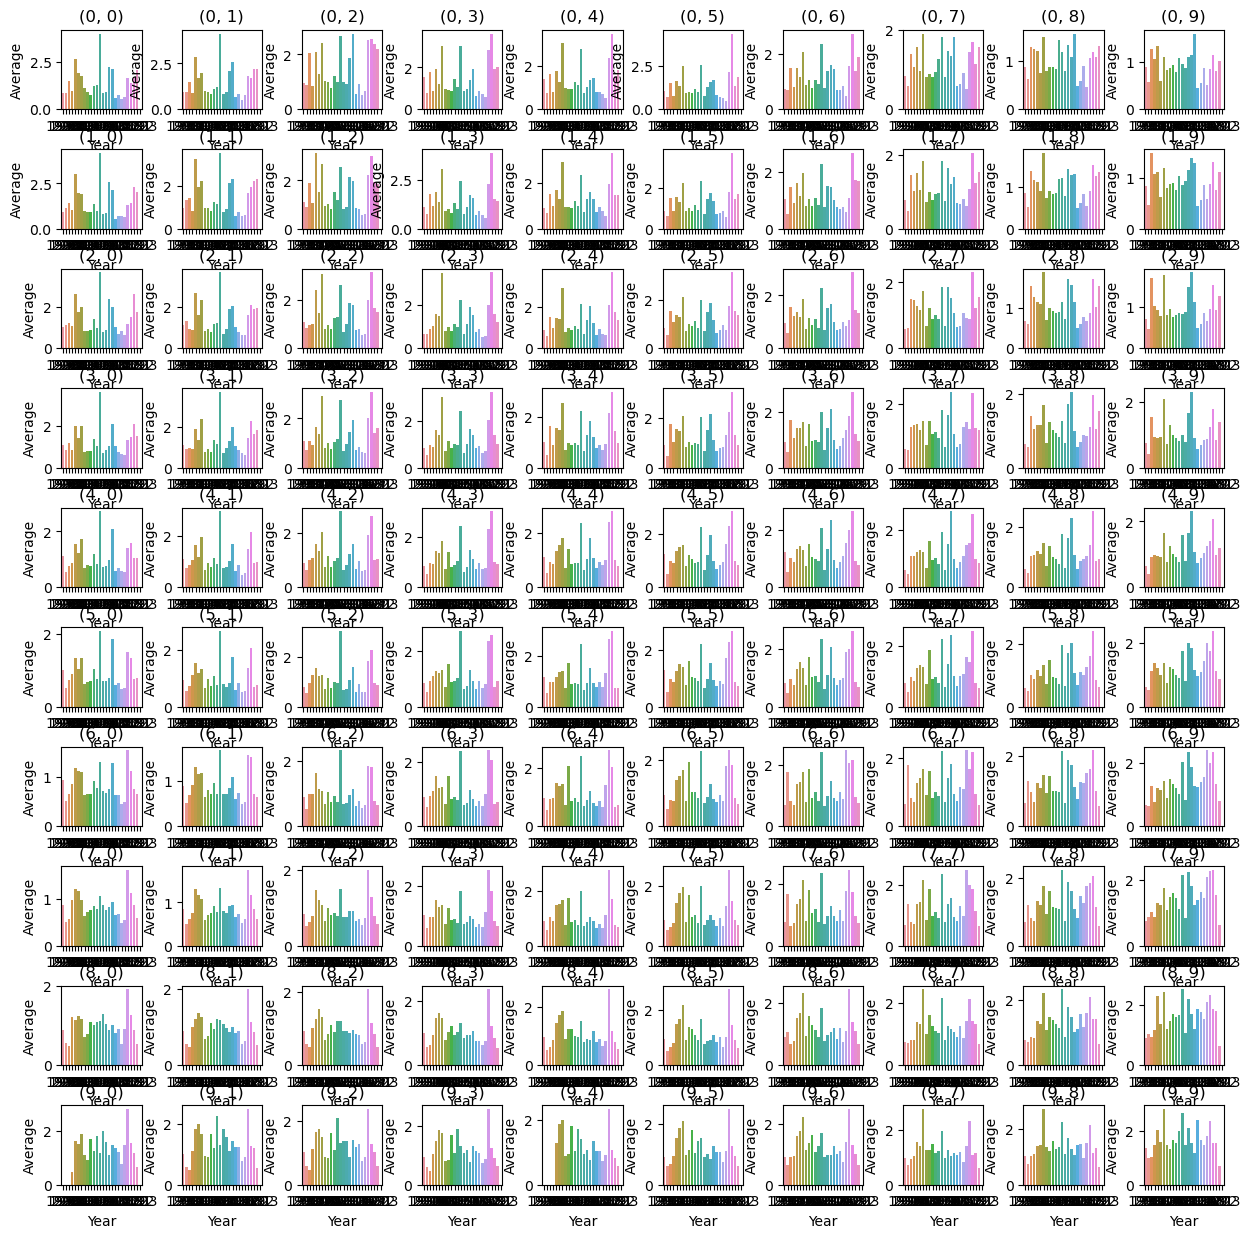

In [251]:
# Create a 10x10 grid of subplots
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        # y = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y = [v[i, j] for v in annual_averages.values()]

        # Generate x values
        x = list(annual_averages.keys())

        # Plot bar graph on the i,j subplot
        sns.barplot(x=x, y=y, ax=axs[i, j])

        # Set x and y labels
        axs[i, j].set_xlabel('Year')
        axs[i, j].set_ylabel('Average')

        # Set title
        axs[i, j].set_title(f'({i}, {j})')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


In [253]:
# print max value in annual_averages
max_value = np.nanmax(list(annual_averages.values()))
print(max_value)

4.339278815149026


In [255]:
list(annual_averages.keys())[-1]

'2023'

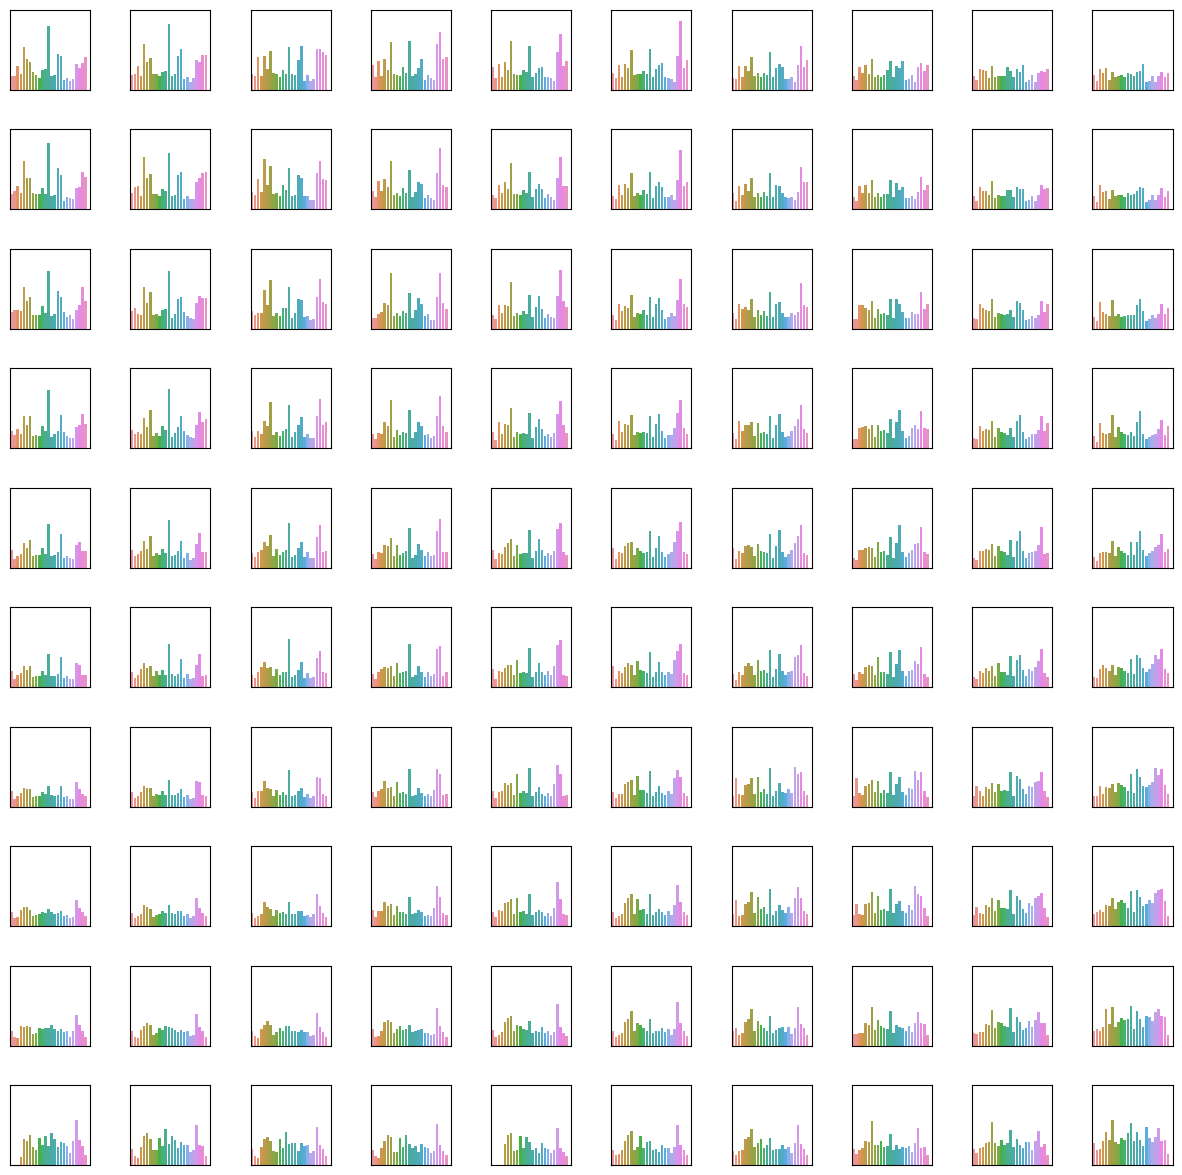

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 10x10 grid of subplots
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y = [v[i, j] for v in annual_averages.values()]

        # Generate x values
        x = list(annual_averages.keys())

        # Plot bar graph on the i,j subplot
        sns.barplot(x=x, y=y, ax=axs[i, j])

        # Remove title, xticks, xlabels, yticks, ylabels
        axs[i, j].set_title('')
        axs[i, j].set_xticks([])
        axs[i, j].set_xlabel('')
        axs[i, j].set_yticks([])
        axs[i, j].set_ylabel('')

        # Set y limit
        axs[i, j].set_ylim([0, 5])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

In [256]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [259]:
annual_averages.pop('2023')
annual_medians.pop('2023')
annual_stddevs.pop('2023')


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

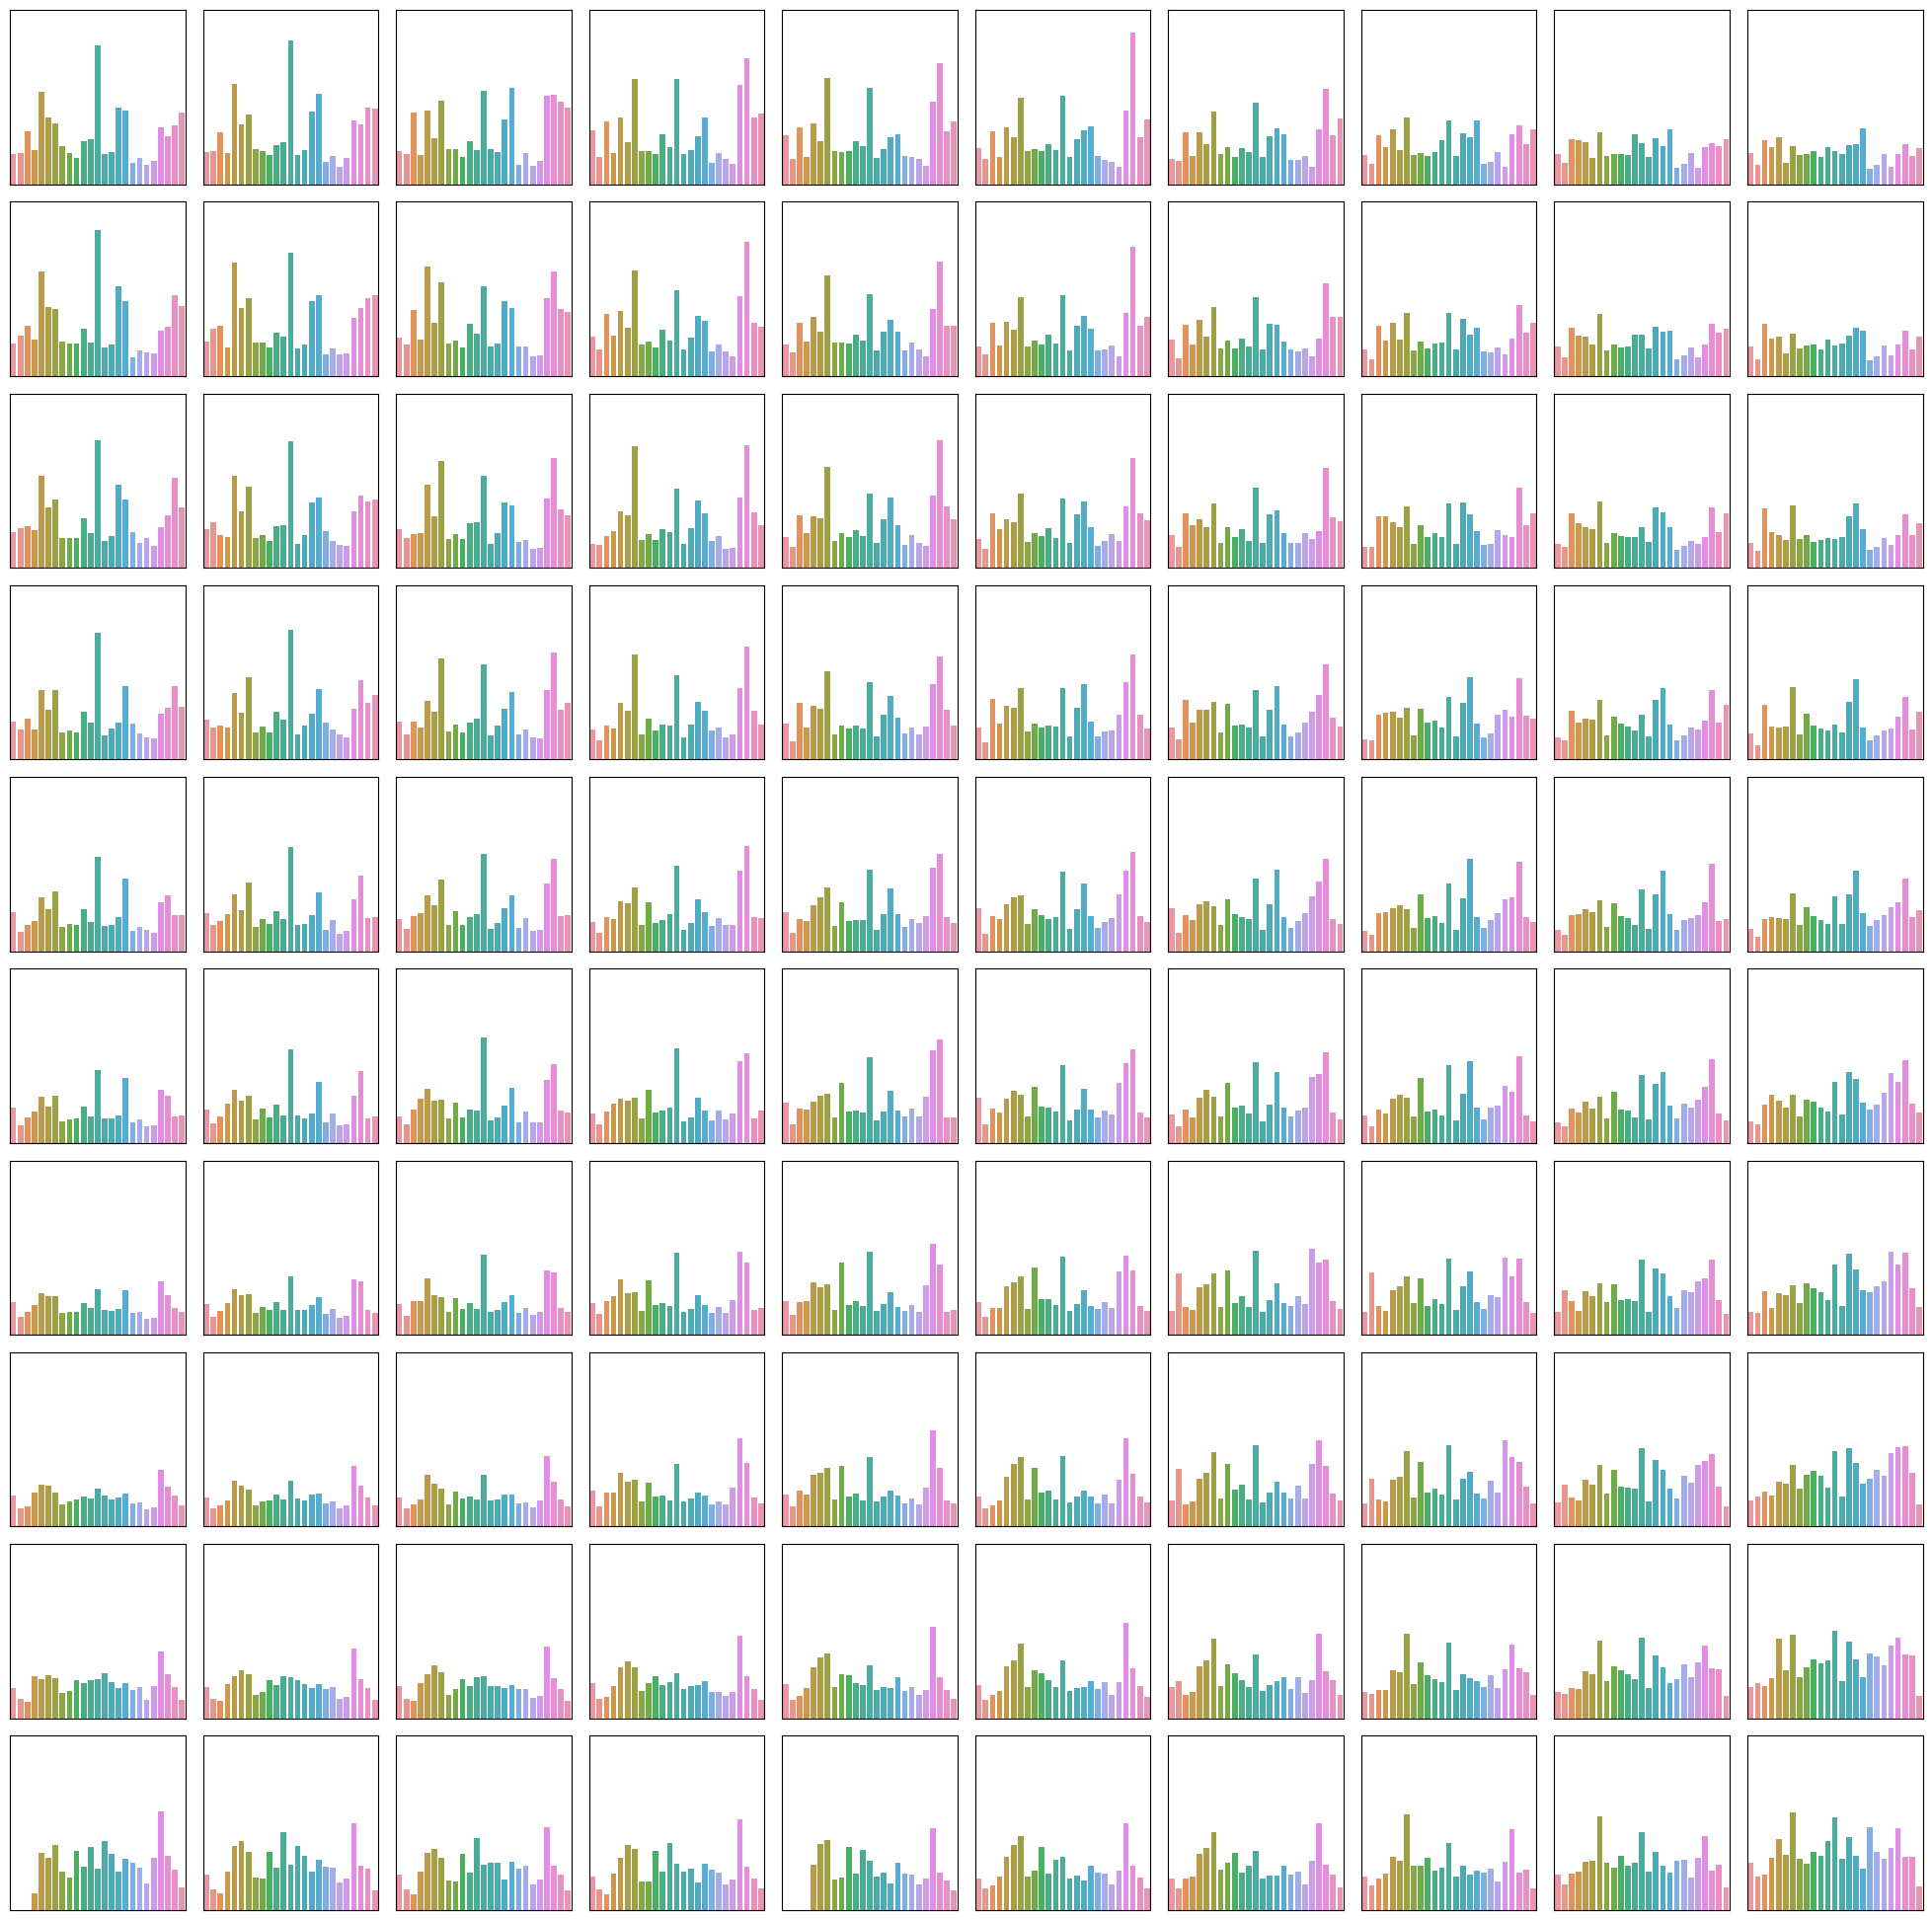

<Figure size 640x480 with 0 Axes>

In [267]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a 10x10 grid of subplots
fig, axs = plt.subplots(10, 10, figsize=(25, 25))
# plt.subplots_adjust(top=0.9)

# Add title and subtitle
# fig.suptitle('Average Annual Chlorophyll-a\n1998-2023', fontsize=16)

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y = [v[i, j] for v in annual_averages.values()]

        # Generate x values
        x = list(annual_averages.keys())

        # Plot bar graph on the i,j subplot
        sns.barplot(x=x, y=y, ax=axs[i, j])

        # Remove title, xticks, xlabels, yticks, ylabels
        axs[i, j].set_title('')
        axs[i, j].set_xticks([])
        axs[i, j].set_xlabel('')
        axs[i, j].set_yticks([])
        axs[i, j].set_ylabel('')

        # Set y limit
        axs[i, j].set_ylim([0, 5])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()
# save the figure
plt.savefig('annual_averages.png')

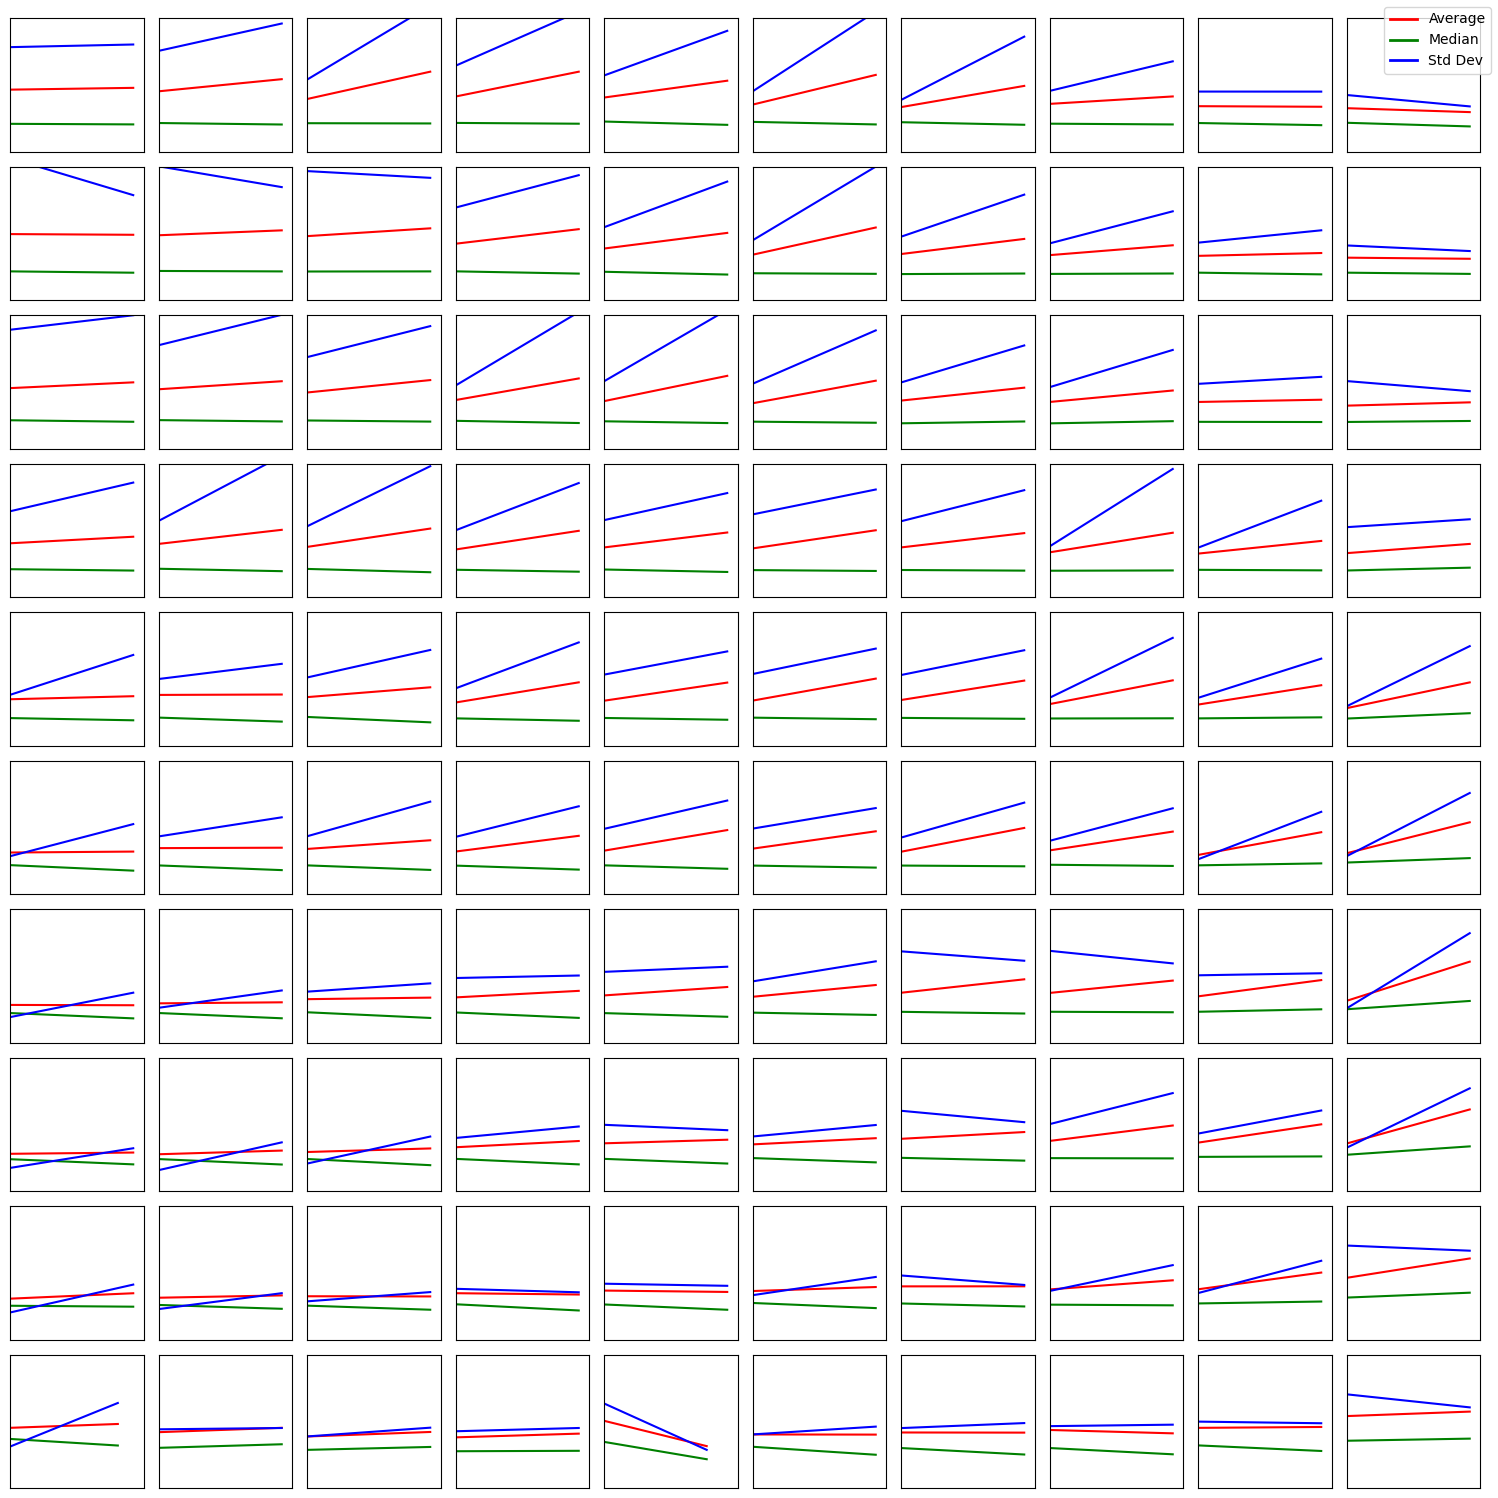

In [268]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Create a custom legend
custom_lines = [plt.Line2D([0], [0], color='red', lw=2),
                plt.Line2D([0], [0], color='green', lw=2),
                plt.Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_lines, ['Average', 'Median', 'Std Dev'], loc='upper right')

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        # axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)

        # # Hide grid border
        # axs[i, j].spines['top'].set_visible(False)
        # axs[i, j].spines['right'].set_visible(False)
        # axs[i, j].spines['bottom'].set_visible(False)
        # axs[i, j].spines['left'].set_visible(False)

        # Hide labels, ticks, and borders
        axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)
        # axs[i, j].spines['top'].set_visible(False)
        # axs[i, j].spines['right'].set_visible(False)
        # axs[i, j].spines['bottom'].set_visible(False)
        # axs[i, j].spines['left'].set_visible(False)

# # Enable labels for bottom row and leftmost column
# for ax in axs[9, :]:
#     ax.tick_params(labelbottom=True)
#     ax.spines['bottom'].set_visible(True)
# for ax in axs[:, 0]:
#     ax.tick_params(labelleft=True)
#     ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.show()
plt.close()

# Quick Plot Summary

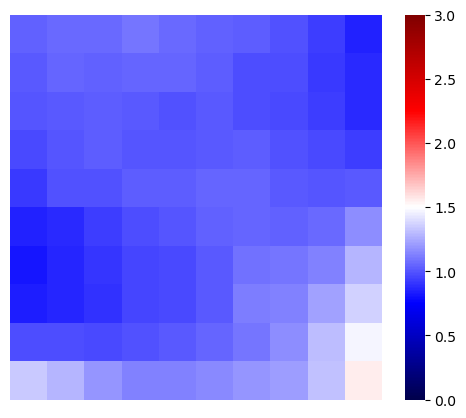

In [317]:
# plot averages as a heatmap 
plt.figure(figsize=(6, 5))
sns.heatmap(chla_grid_averages, cmap='seismic', vmin=0, vmax=3)

# Remove x and y labels and ticks
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

plt.show()
plt.close()

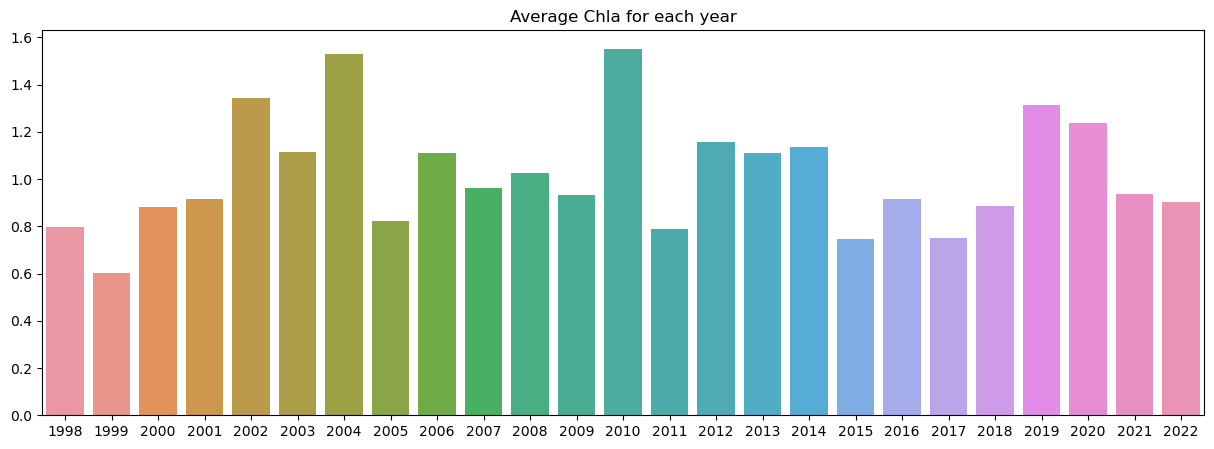

In [216]:
# plot the averages for each year (keys) in averages as bar plot with a trendline
plt.figure(figsize=(15, 5))
sns.barplot(x=list(annual_averages.keys()), y=list(annual_averages.values()))

# sns.lineplot(x=list(annual_averages.keys()), y=list(annual_averages.values()))

plt.title('Average Chla for each year')
plt.show()
plt.close()


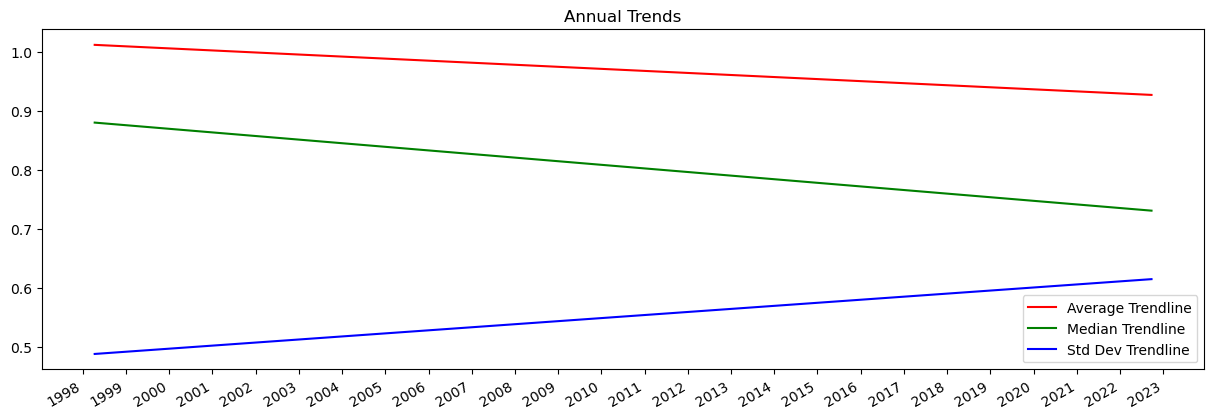

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Convert the dictionary values to lists and remove NaN values
y_avg = [v for v in daily_averages.values() if not np.isnan(v)]
y_med = [v for v in daily_median.values() if not np.isnan(v)]
y_std = [v for v in daily_stddev.values() if not np.isnan(v)]

# Generate x values
x_avg = [datetime.strptime(str(k), '%Y%m%d') for k, v in daily_averages.items() if not np.isnan(v)]
x_med = [datetime.strptime(str(k), '%Y%m%d') for k, v in daily_median.items() if not np.isnan(v)]
x_std = [datetime.strptime(str(k), '%Y%m%d') for k, v in daily_stddev.items() if not np.isnan(v)]

# Convert dates to numbers
x_avg_num = mdates.date2num(x_avg)
x_med_num = mdates.date2num(x_med)
x_std_num = mdates.date2num(x_std)

# Calculate trendlines
coefficients_avg = np.polyfit(x_avg_num, y_avg, 1)
trendline_avg = np.poly1d(coefficients_avg)

coefficients_med = np.polyfit(x_med_num, y_med, 1)
trendline_med = np.poly1d(coefficients_med)

coefficients_std = np.polyfit(x_std_num, y_std, 1)
trendline_std = np.poly1d(coefficients_std)

# Generate y values for the trendlines
y_trend_avg = trendline_avg(x_avg_num)
y_trend_med = trendline_med(x_med_num)
y_trend_std = trendline_std(x_std_num)

# Plot trendlines
plt.figure(figsize=(15, 5))
plt.plot(x_avg, y_trend_avg, color='red', label='Average Trendline')
plt.plot(x_med, y_trend_med, color='green', label='Median Trendline')
plt.plot(x_std, y_trend_std, color='blue', label='Std Dev Trendline')

plt.title('Annual Trends')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # set interval to 1 year
plt.gcf().autofmt_xdate()  # rotate dates for better display

plt.legend()
plt.show()
plt.close()

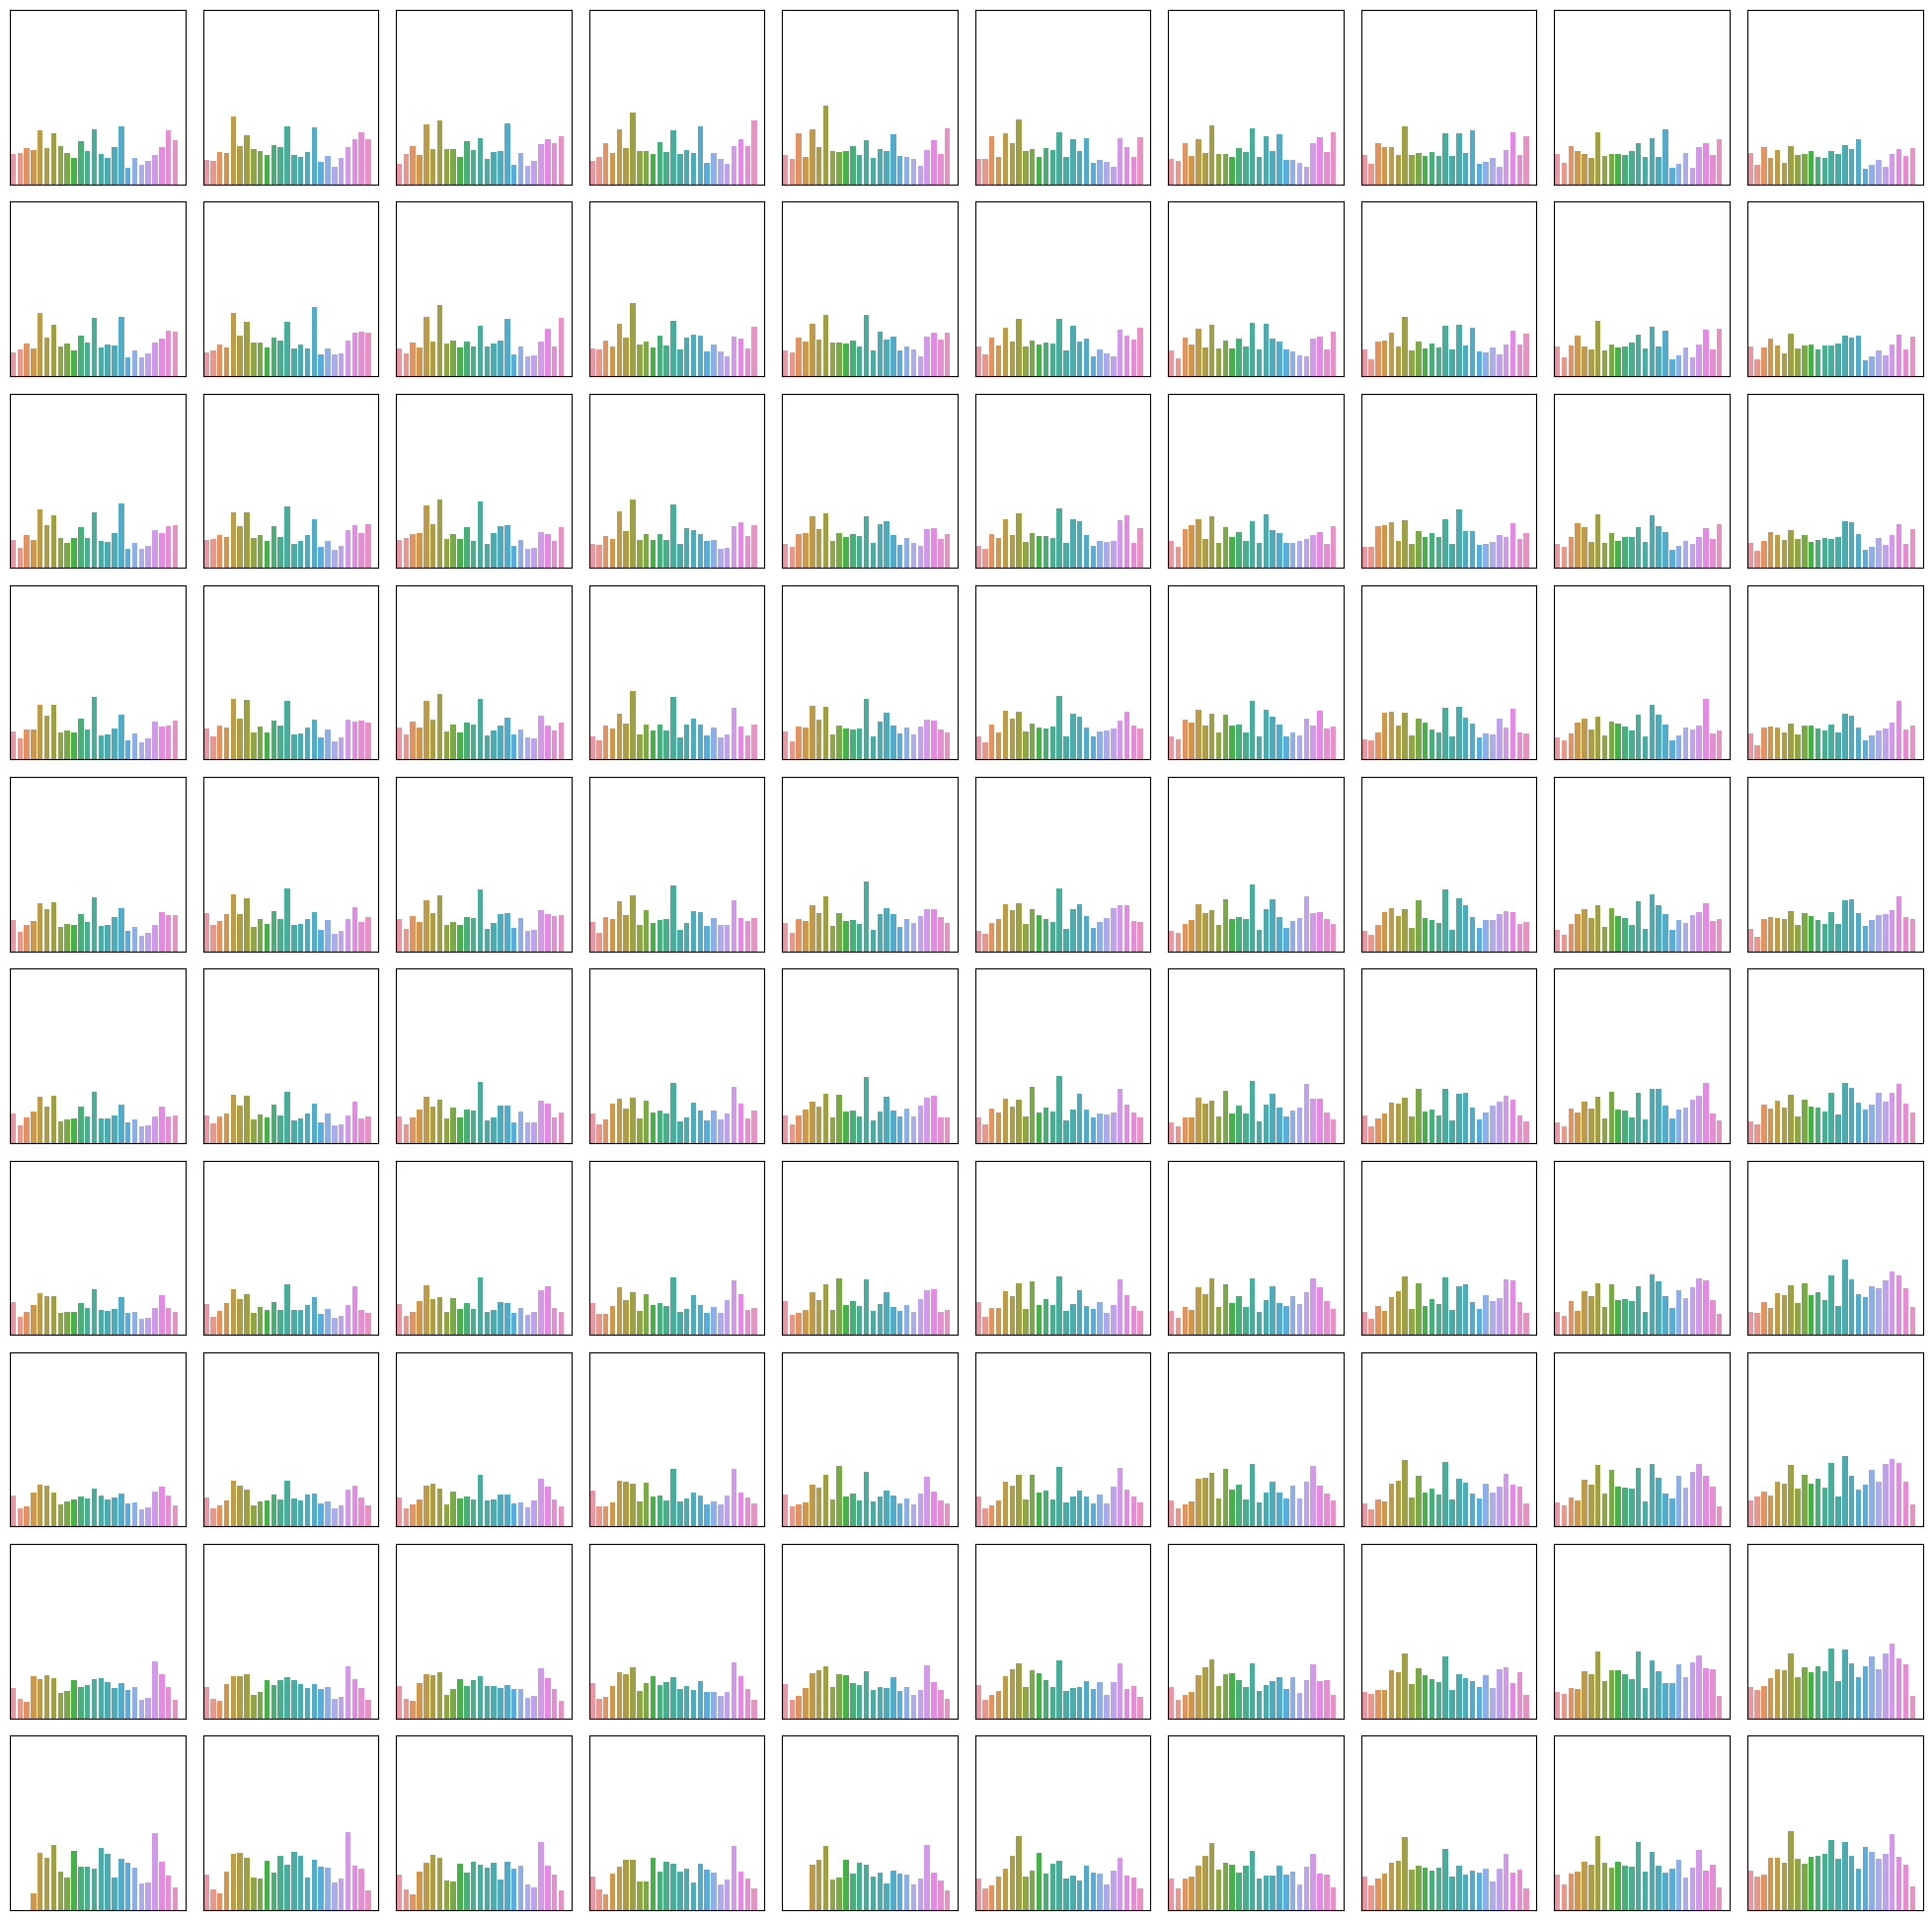

<Figure size 640x480 with 0 Axes>

In [322]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a 10x10 grid of subplots
fig, axs = plt.subplots(10, 10, figsize=(25, 25))
# plt.subplots_adjust(top=0.9)

# Add title and subtitle
# fig.suptitle('Average Annual Chlorophyll-a\n1998-2023', fontsize=16)

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y = [v[i, j] for v in annual_averages.values()]

        # Generate x values
        x = list(annual_averages.keys())

        # Plot bar graph on the i,j subplot
        sns.barplot(x=x, y=y, ax=axs[i, j])

        # Remove title, xticks, xlabels, yticks, ylabels
        axs[i, j].set_title('')
        axs[i, j].set_xticks([])
        axs[i, j].set_xlabel('')
        axs[i, j].set_yticks([])
        axs[i, j].set_ylabel('')

        # Set y limit
        axs[i, j].set_ylim([0, 5])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()
# save the figure
plt.savefig('annual_averages.png')

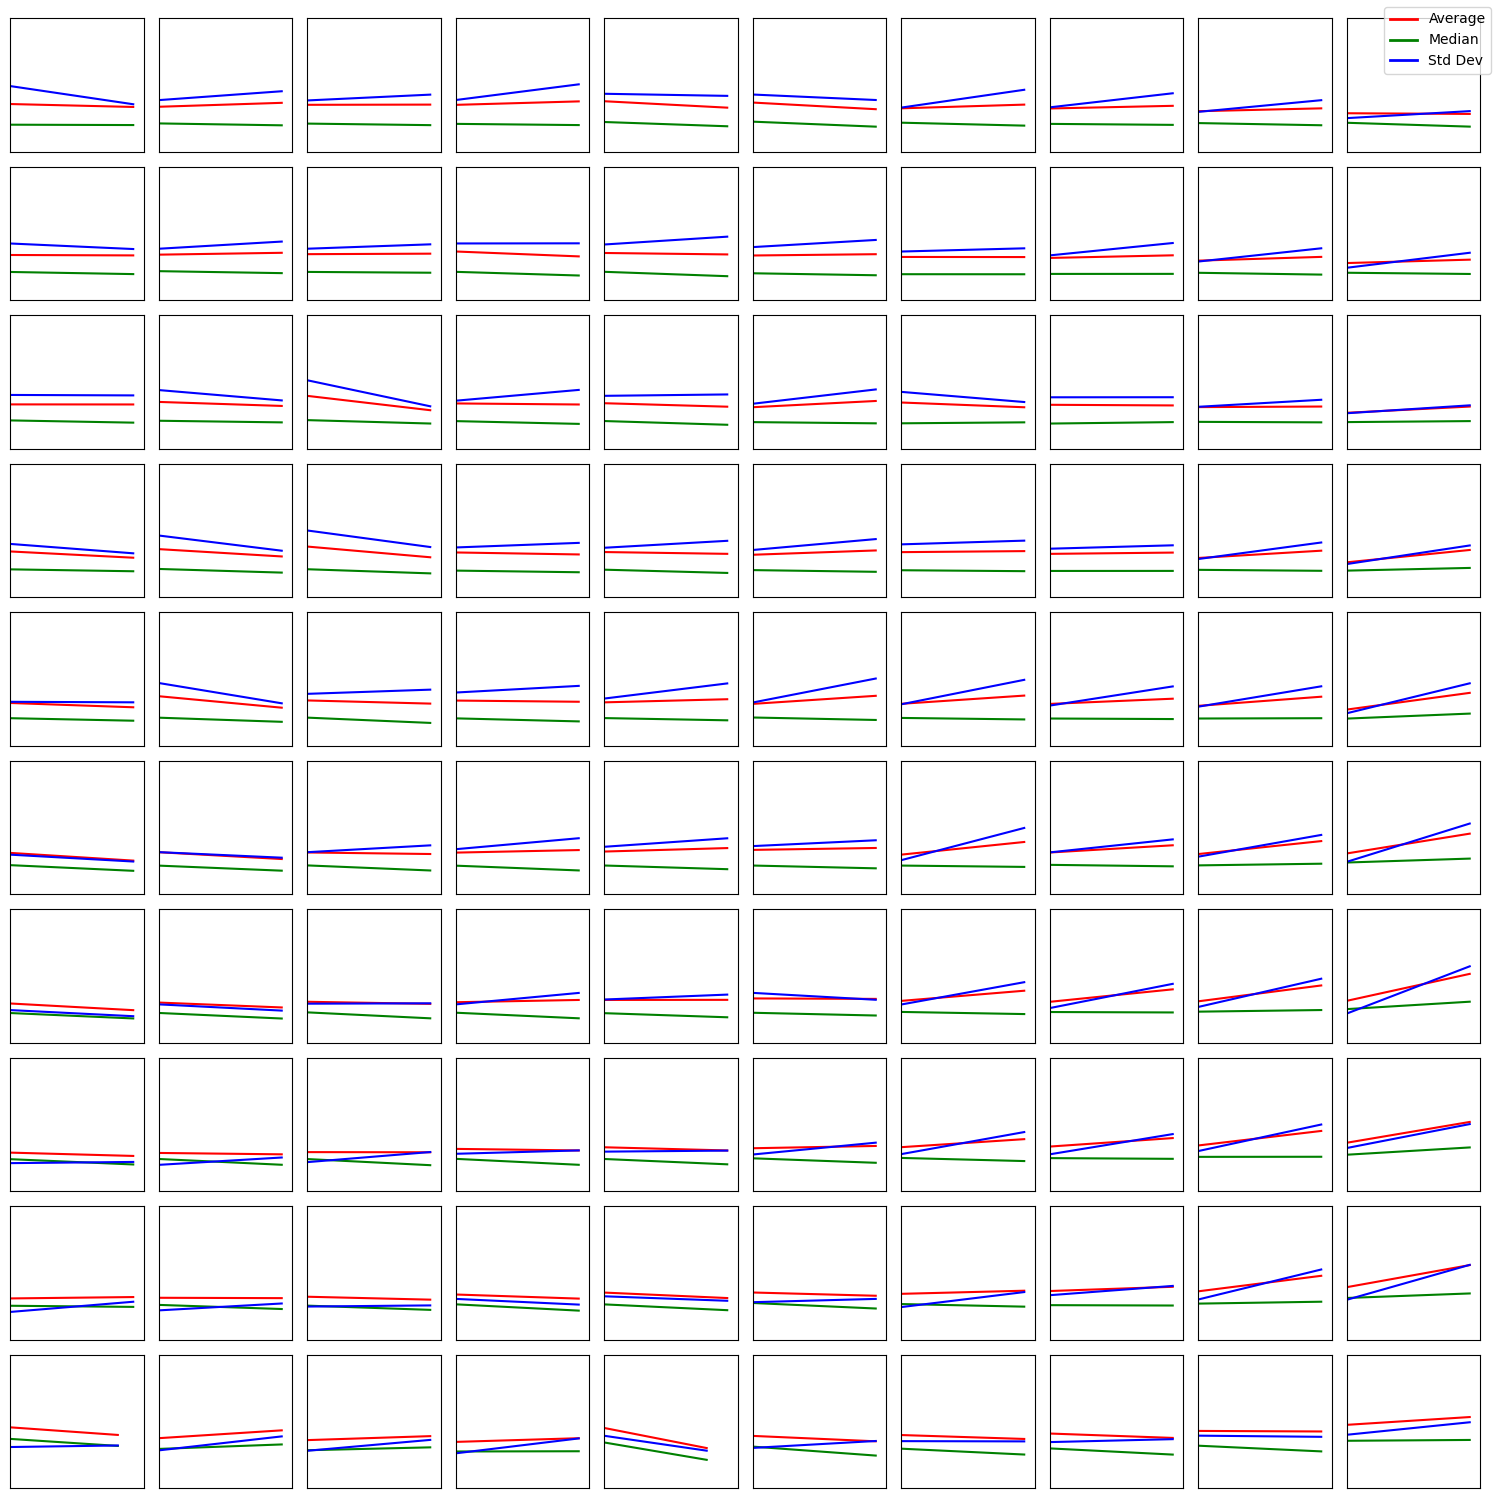

In [323]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 10, figsize=(15, 15))

# Create a custom legend
custom_lines = [plt.Line2D([0], [0], color='red', lw=2),
                plt.Line2D([0], [0], color='green', lw=2),
                plt.Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_lines, ['Average', 'Median', 'Std Dev'], loc='upper right')

# Iterate over each subplot
for i in range(10):
    for j in range(10):
        # Extract the i,j element from each dictionary value
        y_avg = [v[i, j] for v in annual_averages.values() if not np.isnan(v[i, j])]
        y_med = [v[i, j] for v in annual_medians.values() if not np.isnan(v[i, j])]
        y_std = [v[i, j] for v in annual_stddevs.values() if not np.isnan(v[i, j])]

        # Generate x values
        x_avg = np.arange(len(y_avg))
        x_med = np.arange(len(y_med))
        x_std = np.arange(len(y_std))

        # Calculate trendlines
        coefficients_avg = np.polyfit(x_avg, y_avg, 1)
        trendline_avg = np.poly1d(coefficients_avg)

        coefficients_med = np.polyfit(x_med, y_med, 1)
        trendline_med = np.poly1d(coefficients_med)

        coefficients_std = np.polyfit(x_std, y_std, 1)
        trendline_std = np.poly1d(coefficients_std)

        # Generate y values for the trendlines
        y_trend_avg = trendline_avg(x_avg)
        y_trend_med = trendline_med(x_med)
        y_trend_std = trendline_std(x_std)

        # Plot trendlines on the i,j subplot
        axs[i, j].plot(x_avg, y_trend_avg, color='red')
        axs[i, j].plot(x_med, y_trend_med, color='green')
        axs[i, j].plot(x_std, y_trend_std, color='blue')

        # Set x and y limits
        axs[i, j].set_xlim([0, 26])
        axs[i, j].set_ylim([0, 3])

        # Control display of ticks
        # axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)

        # # Hide grid border
        # axs[i, j].spines['top'].set_visible(False)
        # axs[i, j].spines['right'].set_visible(False)
        # axs[i, j].spines['bottom'].set_visible(False)
        # axs[i, j].spines['left'].set_visible(False)

        # Hide labels, ticks, and borders
        axs[i, j].tick_params(labelbottom=False, labelleft=False, length=0)
        # axs[i, j].spines['top'].set_visible(False)
        # axs[i, j].spines['right'].set_visible(False)
        # axs[i, j].spines['bottom'].set_visible(False)
        # axs[i, j].spines['left'].set_visible(False)

# # Enable labels for bottom row and leftmost column
# for ax in axs[9, :]:
#     ax.tick_params(labelbottom=True)
#     ax.spines['bottom'].set_visible(True)
# for ax in axs[:, 0]:
#     ax.tick_params(labelleft=True)
#     ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.show()
plt.close()